# i .Perkenalan


=================================================

Hospital-LOS-prediction

Nama  : Muhammad Iqbal  
Latar belakang :

Problem :
Rumah sakit merupakan salah infrastruktur penting dalam suatu negara. Dimana setiap harinya banyak pasien yg datang kerumah sakit untuk rawat inap atau konsultasi dokter. Di beberapa sumber, rumah sakit di indonesia tak jarang yg mengalami Overload karena manajemen rumah sakit yg kurang dan jumlah pasien yg tidak terprediksi pada suatu waktu, sehingga menyebabkan ketidakseimbangan dalam alokasi tempat tidur dan tenaga medis. Dataset yg dipakai pada projek kali ini berisi tentang faktor - faktor seperti riwayat medis, jenis penyakit, dan lain lain.

Objective:  
Program model machine learning yang akan dibuat kali ini, akan mem prediksi berapa lama rawat inap pasien, hal ini akan membantu rumah sakit untuk alokasi sumber daya (tenaga medis, staf) dan perencanaan kapasitas.

User/pengguna : Manajemen Rumah Sakit sebelum melakukan rencana perawatan untuk mengoptimalkan perencanaan kapasitas tempat tidur dan sumber daya medis.

=================================================


# ii. Import libraries

>Import seluruh library yg akan digunakan untuk projek kali ini

In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import phik
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder,PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import StratifiedKFold, cross_validate, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
from feature_engine.outliers import Winsorizer
from xgboost import XGBRegressor
import pickle

# iii. Data loading

Loading dataset proses melihat bentuk data dan eksplorasi data

In [2]:
#Load dan duplikat data
df_ori = pd.read_csv('LengthOfStay.csv')
df = df_ori.copy()
df.head()

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,8/29/2012,0,F,0,0,0,0,0,0,...,192.476918,12.0,1.390722,30.432418,96,6.5,4,9/1/2012,B,3
1,2,5/26/2012,5+,F,0,0,0,0,0,0,...,94.078507,8.0,0.943164,28.460516,61,6.5,1,6/2/2012,A,7
2,3,9/22/2012,1,F,0,0,0,0,0,0,...,130.530524,12.0,1.065750,28.843812,64,6.5,2,9/25/2012,B,3
3,4,8/9/2012,0,F,0,0,0,0,0,0,...,163.377028,12.0,0.906862,27.959007,76,6.5,1,8/10/2012,A,1
4,5,12/20/2012,0,F,0,0,0,1,0,1,...,94.886654,11.5,1.242854,30.258927,67,5.6,2,12/24/2012,E,4


In [3]:
#Cek info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   eid                         100000 non-null  int64  
 1   vdate                       100000 non-null  object 
 2   rcount                      100000 non-null  object 
 3   gender                      100000 non-null  object 
 4   dialysisrenalendstage       100000 non-null  int64  
 5   asthma                      100000 non-null  int64  
 6   irondef                     100000 non-null  int64  
 7   pneum                       100000 non-null  int64  
 8   substancedependence         100000 non-null  int64  
 9   psychologicaldisordermajor  100000 non-null  int64  
 10  depress                     100000 non-null  int64  
 11  psychother                  100000 non-null  int64  
 12  fibrosisandother            100000 non-null  int64  
 13  malnutrition   

In [4]:
# Cek missing value
df.isna().sum()

eid                           0
vdate                         0
rcount                        0
gender                        0
dialysisrenalendstage         0
asthma                        0
irondef                       0
pneum                         0
substancedependence           0
psychologicaldisordermajor    0
depress                       0
psychother                    0
fibrosisandother              0
malnutrition                  0
hemo                          0
hematocrit                    0
neutrophils                   0
sodium                        0
glucose                       0
bloodureanitro                0
creatinine                    0
bmi                           0
pulse                         0
respiration                   0
secondarydiagnosisnonicd9     0
discharged                    0
facid                         0
lengthofstay                  0
dtype: int64

In [5]:
# Cek duplikat
df.duplicated().sum()

np.int64(0)

In [6]:
#Change date type to datetime
df['vdate'] = pd.to_datetime(df['vdate'])
df['discharged'] = pd.to_datetime(df['discharged'])
df[['vdate','discharged' ]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   vdate       100000 non-null  datetime64[ns]
 1   discharged  100000 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 1.5 MB


In [7]:
#Cek statistik dasar
df.describe().T

,count,mean,min,25%,50%,75%,max,std
eid,100000.0,50000.5,1.0,25000.75,50000.5,75000.25,100000.0,28867.657797
vdate,100000,2012-07-02 09:42:03.743999744,2012-01-01 00:00:00,2012-04-01 00:00:00,2012-07-03 00:00:00,2012-10-03 00:00:00,2013-01-01 00:00:00,NaN
dialysisrenalendstage,100000.0,0.03642,0.0,0.0,0.0,0.0,1.0,0.187334
asthma,100000.0,0.03527,0.0,0.0,0.0,0.0,1.0,0.184462
irondef,100000.0,0.09494,0.0,0.0,0.0,0.0,1.0,0.293134
pneum,100000.0,0.03945,0.0,0.0,0.0,0.0,1.0,0.194664
substancedependence,100000.0,0.06306,0.0,0.0,0.0,0.0,1.0,0.243072
psychologicaldisordermajor,100000.0,0.23904,0.0,0.0,0.0,0.0,1.0,0.426499
depress,100000.0,0.05166,0.0,0.0,0.0,0.0,1.0,0.221341
psychother,100000.0,0.04939,0.0,0.0,0.0,0.0,1.0,0.216682


Diketahui:
- Data merupakan pengambilan dalam waktu setahun, tahun 2012 awal sampai 2013 awal
- Data banyak memiliki pasien dengan kadar glukosa diatas 140 mg/dL dengan quartil 3 nya sudah diangka 162 mg/dL, artinya banyak pasien dengan kondisi diabetes.
- BMI pasien rata-rata di angka 29 kg/m2, jika melihat sumber di internet, ini angka yg menunjukkan individu overweight. Data yg dimiliki rata-rata pasiennya overweight.
- `glucose` dilihat dari nilai minimum, terdapat nilai yg negatif
- Rata-rata pasien menjalani rawat inap adalah 4 hari.
- Dilihat dari nilai mean dan median, data rata-rata memiliki kolom yg terdistribusi normal

In [8]:
#Check value negatif di kolom numeric 
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    if (df[col] < 0).any() :
        print(col)


glucose


# iv. Exploratory Data Analysis (EDA)

>Pada bagian ini akan dilakukan beberapa eskplorasi data dengan visualisasi dan sebagainya. Terdapat beberapa pertanyaan yg akan dijawab.

1. Bagaimana nilai rata-rata `bmi` terhadap tiap jenis kelamin?

<Axes: xlabel='gender'>

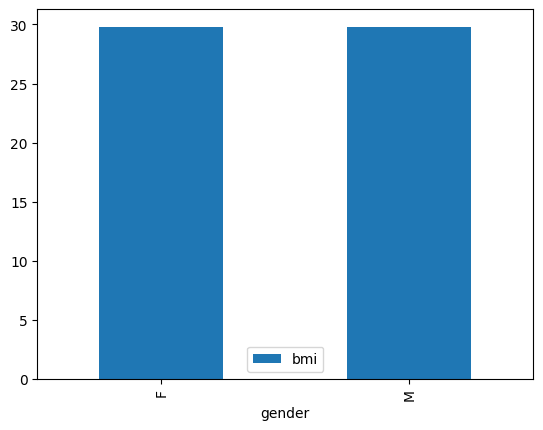

In [9]:
df.groupby('gender')[['bmi']].mean().plot(kind='bar')

2. Apakah ada pola antara pengaruh `bmi` dengan variabel `glucose`, `malnutriton`, `sodium`, dan `respiration`?

Untuk menjawab pertanyaan ini, akan dihitung korelasi antar variabel A dengan Variabel B menggunakan korelasi Pearson karena yg ingin kita cari korelasi nya berjenis data numerikal.

In [10]:
#Define korelasi pearson
cor_col = ['glucose','sodium', 'pulse', 'respiration']

#Cek korelasi pearson
for col in cor_col:
    t_stats, pvalue = stats.pearsonr(df['bmi'], df[col])
    print(f"t-stats {col}: {t_stats}")
    print(f"p-value {col}: {pvalue}")
    print('')
    

t-stats glucose: -2.412426720114309e-05
p-value glucose: 0.9939132628088431

t-stats sodium: 0.0011009150372219485
p-value sodium: 0.7277383072229002

t-stats pulse: -0.0009335691925103337
p-value pulse: 0.7678282123858338

t-stats respiration: -0.0014496479169207046
p-value respiration: 0.6466554427814882



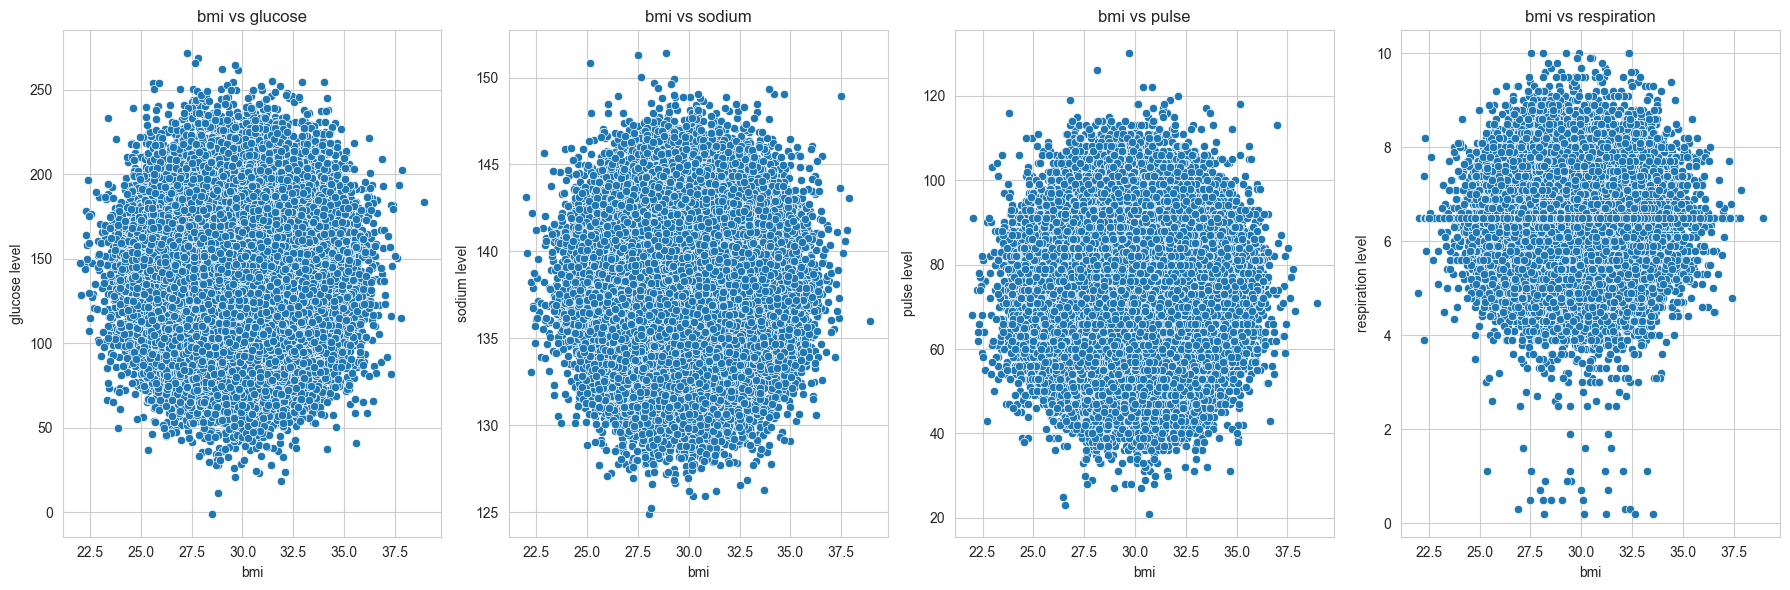

In [11]:
#Membuat visualisasi dengan scatterplot

#Set style plot
sns.set_style("whitegrid")

#Define plot 
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

# 1.
sns.scatterplot(data=df, x="bmi", y="glucose", ax=axes[0])
axes[0].set_title("bmi vs glucose")
axes[0].set_xlabel("bmi")
axes[0].set_ylabel("glucose level")

# 2. 
sns.scatterplot(data=df, x="bmi", y="sodium", ax=axes[1])
axes[1].set_title("bmi vs sodium")
axes[1].set_xlabel("bmi")
axes[1].set_ylabel("sodium level")

# 3. 
sns.scatterplot(data=df, x="bmi", y="pulse", ax=axes[2])
axes[2].set_title("bmi vs pulse")
axes[2].set_xlabel("bmi")
axes[2].set_ylabel("pulse level")

# 4. 
sns.scatterplot(data=df, x="bmi", y="respiration", ax=axes[3])
axes[3].set_title("bmi vs respiration")
axes[3].set_xlabel("bmi")
axes[3].set_ylabel("respiration level")

plt.tight_layout()
plt.show()

In [12]:
df.columns

Index(['eid', 'vdate', 'rcount', 'gender', 'dialysisrenalendstage', 'asthma',
       'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor',
       'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo',
       'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro',
       'creatinine', 'bmi', 'pulse', 'respiration',
       'secondarydiagnosisnonicd9', 'discharged', 'facid', 'lengthofstay'],
      dtype='object')

3. Bagaimana trend waktu berkunjung (vdate) dari waktu ke waktu?

<Axes: xlabel='vdate'>

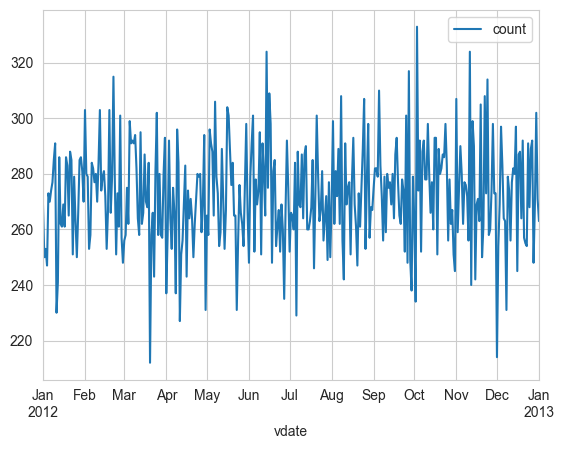

In [13]:
df.groupby('vdate')[['vdate']].count().rename(columns={'vdate': 'count'}).plot()

4. Bagaimana distribusi pasien tiap fasilitas rumah sakit?

In [14]:
#Create facilites distribution
eda_4 = df.groupby('facid')[['facid']].count()
eda_4

,facid
facid,
A,30035
B,30012
C,4699
D,4499
E,30755


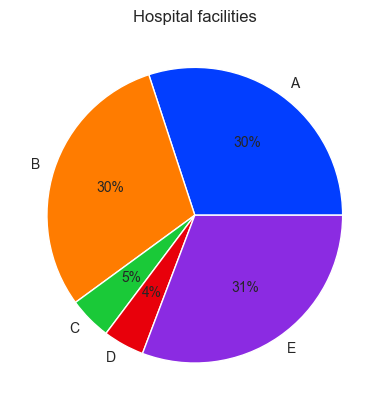

In [15]:
#Make pie chart
palette_color = sns.color_palette('bright')
plt.pie(eda_4['facid'], labels=eda_4.index, colors=palette_color, autopct='%.0f%%') 
plt.title(label='Hospital facilities')

# displaying chart 
plt.show() 

5. Berdasarkan level nya, BMI dapat diklasifikasikan menjadi :
    - Underweight : dibawah 18.5 kg/m2
    - Normal weight : 18.5 - 24.9 kg/m2
    - Overweight : 25.0 - 29.9 kg/m2
    - Obesity class 1 : 30.0 - 34.9 kg/m2
    - Obesity class 2 : 35.0 - 39.9 kg/m2
    - Obesity class 3 : diatas 40

Buatlah visualisasi yg menggambarkan persentase masing-masing kategori diatas.

In [16]:
#Fungsi untuk membuat klasifikasi BMI berdasarkan levelnya

def bmiClassification(df):
    #Membuat data bmi dalam series
    sers = pd.Series(df['bmi'])

    #list kosong untuk nampung klasifikasi
    bmi_class = []

    #Membuat jenis klasifikasi berdasarkan bmi 
    for bmi in sers:
        if bmi < 18.5:
            bmi_class.append('Underweight')
        elif bmi >= 18.5 and bmi < 25:
            bmi_class.append('Normal weight')
        elif bmi >= 25 and bmi < 30 :
            bmi_class.append('Overweight')
        elif bmi >= 30 and bmi < 35:
            bmi_class.append('Obesity 1')
        elif bmi >= 35 and bmi < 40:
            bmi_class.append('Obesity 2')
        else :
            bmi_class.append('Obesity 3')
            
    return bmi_class
    

In [17]:
#Duplikat data
df_eda_5 = df.copy()

# Membuat klasifikasi data
bmi_class = bmiClassification(df_eda_5)
df_eda_5['bmi_class'] = bmi_class
df_eda_5.head()

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay,bmi_class
0,1,2012-08-29,0,F,0,0,0,0,0,0,...,12.0,1.390722,30.432418,96,6.5,4,2012-09-01,B,3,Obesity 1
1,2,2012-05-26,5+,F,0,0,0,0,0,0,...,8.0,0.943164,28.460516,61,6.5,1,2012-06-02,A,7,Overweight
2,3,2012-09-22,1,F,0,0,0,0,0,0,...,12.0,1.065750,28.843812,64,6.5,2,2012-09-25,B,3,Overweight
3,4,2012-08-09,0,F,0,0,0,0,0,0,...,12.0,0.906862,27.959007,76,6.5,1,2012-08-10,A,1,Overweight
4,5,2012-12-20,0,F,0,0,0,1,0,1,...,11.5,1.242854,30.258927,67,5.6,2,2012-12-24,E,4,Obesity 1


In [18]:
#Membuat data jumlah tiap tiap golongan bmi
df_eda_5 = df_eda_5.groupby('bmi_class')[['eid']].count()

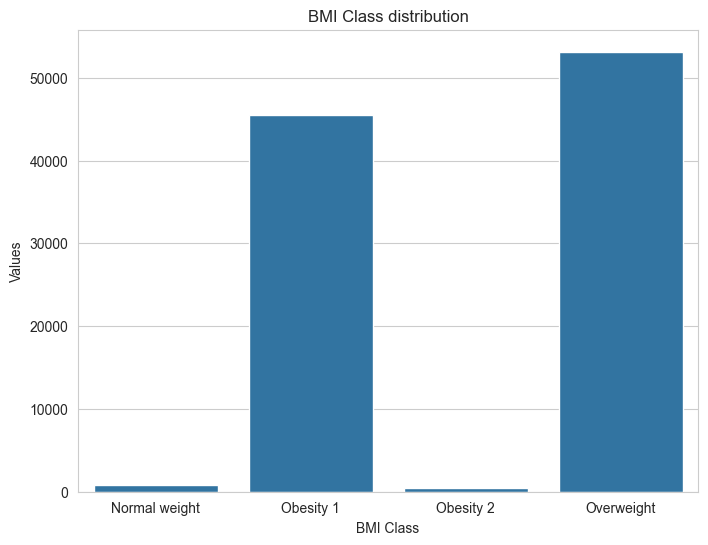

In [19]:
#Membuat distribusi data dengan bar chart
plt.figure(figsize=(8,6))
sns.barplot(data=df_eda_5['eid'])
plt.ylabel("Values")
plt.xlabel("BMI Class")
plt.title("BMI Class distribution")
plt.show()

6. Bagaimana pola hubungan `lenghtofstay` dengan indenpendent variabel lainnya?

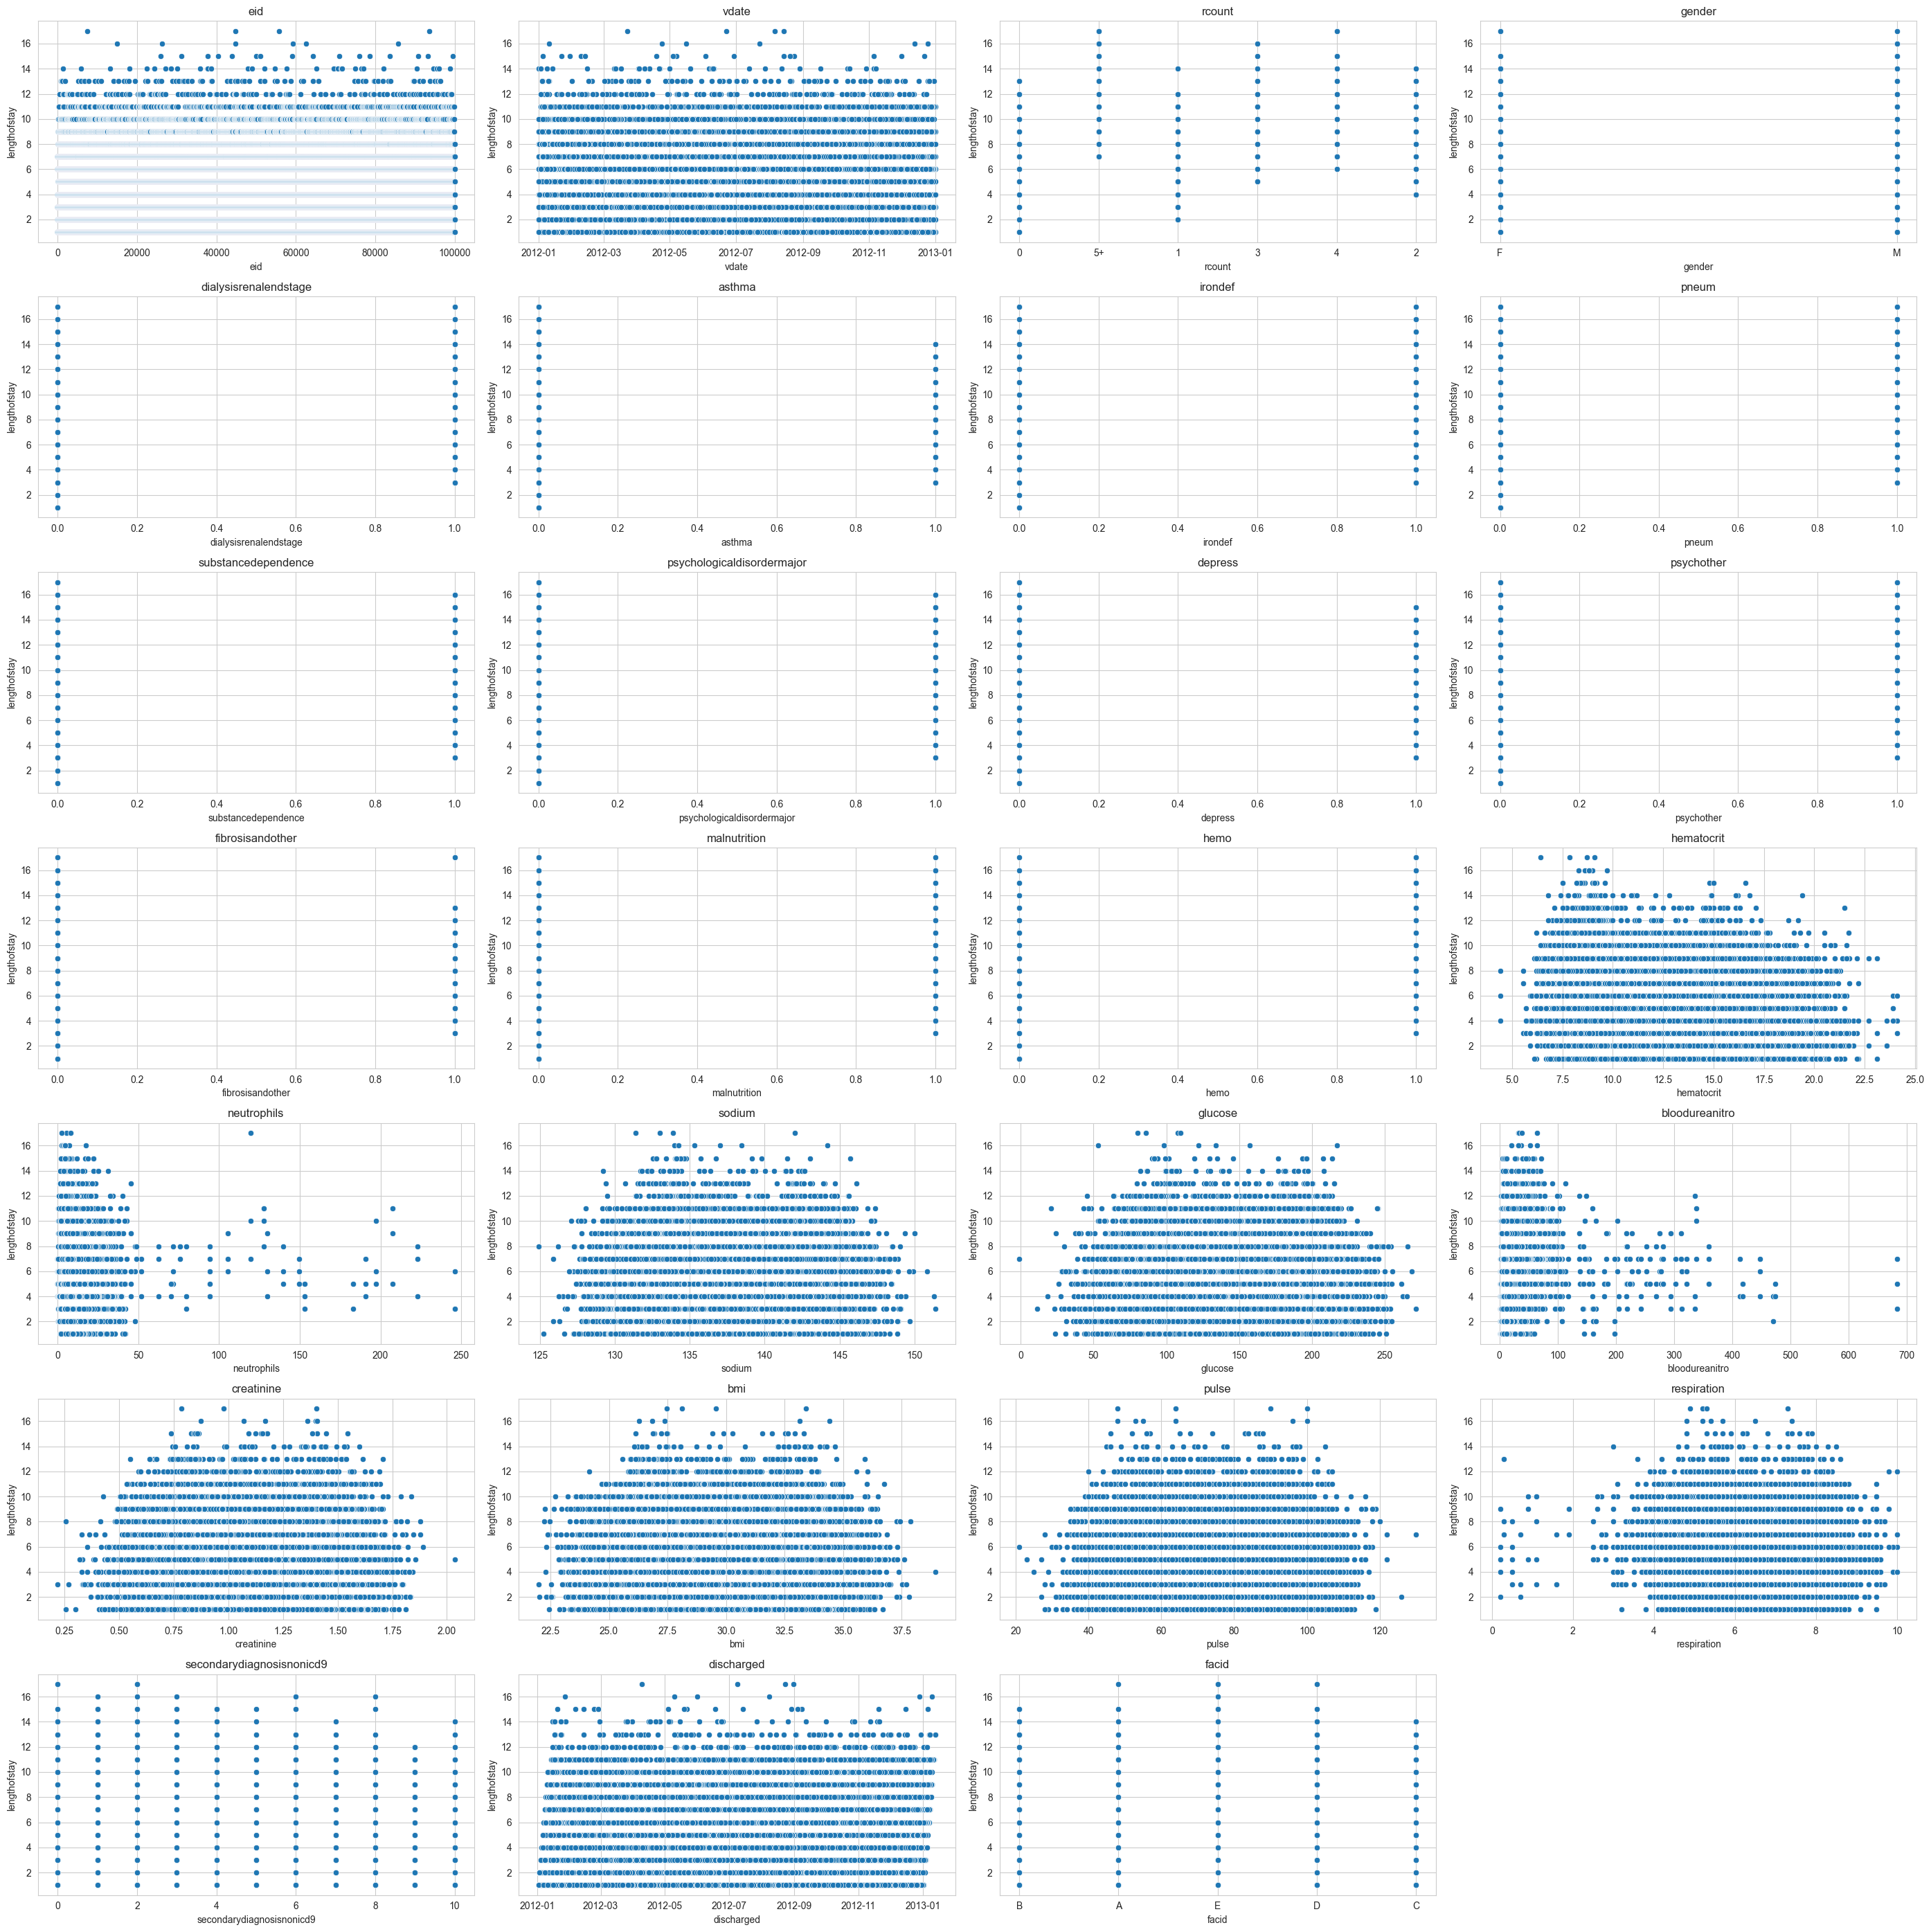

In [20]:
# Check the relationship between independent variables and 'lengthofstay'

fig = plt.figure(figsize=(28, 28))
cols = df.drop('lengthofstay', axis=1).columns.to_list()
num_rows = 7
num_cols = 4

for index in range(min(len(cols), num_rows * num_cols)):
  ax = fig.add_subplot(num_rows, num_cols, index + 1)  # Subplot index starts from 1
  sns.scatterplot(data=df, x=cols[index], y='lengthofstay', ax=ax)
  ax.set_title(cols[index])
  
plt.tight_layout()
plt.show()

Diketahui bahwa, antara `lenghtofstay` dengan independent variable tidak menunjukkan adanya hubungan atau pola linear. Hal ini bisa berguna untuk menentukan jenis algoritma yg akan digunakan saat model training.

# v. Feature Engineering

>Pada bagian ini akan dilakukan feature engineering untuk memodifikasi feature pada data sehingga optimal saat di model training. Bagian ini akan dilakukan proses - proses diantarnya, train test split, outlier handling,   pembuatan fitur, feature selection, dll.

## Feature creation

Membuat feature baru yg tidak memengaruhi target atau data leak sebelum data splitting

In [21]:
# Cek column binary 
for col in numeric_cols:
    print(f"jumlah unique value {col} : {len(df[col].unique())}")

jumlah unique value eid : 100000
jumlah unique value dialysisrenalendstage : 2
jumlah unique value asthma : 2
jumlah unique value irondef : 2
jumlah unique value pneum : 2
jumlah unique value substancedependence : 2
jumlah unique value psychologicaldisordermajor : 2
jumlah unique value depress : 2
jumlah unique value psychother : 2
jumlah unique value fibrosisandother : 2
jumlah unique value malnutrition : 2
jumlah unique value hemo : 2
jumlah unique value hematocrit : 362
jumlah unique value neutrophils : 656
jumlah unique value sodium : 99948
jumlah unique value glucose : 99998
jumlah unique value bloodureanitro : 261
jumlah unique value creatinine : 99994
jumlah unique value bmi : 99994
jumlah unique value pulse : 100
jumlah unique value respiration : 160
jumlah unique value secondarydiagnosisnonicd9 : 11
jumlah unique value lengthofstay : 17


In [22]:
#Membuat fitur jumlah kondisi medis yg sudah diketahui (binary feature sum)
medical_conditions = [
    "dialysisrenalendstage", "asthma", "irondef", "pneum", "substancedependence", 
    "psychologicaldisordermajor", "depress", "psychother", "fibrosisandother", "malnutrition", "hemo"]

df["number_of_issues"] = df[medical_conditions].sum(axis=1)

In [23]:
df.head()

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay,number_of_issues
0,1,2012-08-29,0,F,0,0,0,0,0,0,...,12.0,1.390722,30.432418,96,6.5,4,2012-09-01,B,3,0
1,2,2012-05-26,5+,F,0,0,0,0,0,0,...,8.0,0.943164,28.460516,61,6.5,1,2012-06-02,A,7,0
2,3,2012-09-22,1,F,0,0,0,0,0,0,...,12.0,1.065750,28.843812,64,6.5,2,2012-09-25,B,3,0
3,4,2012-08-09,0,F,0,0,0,0,0,0,...,12.0,0.906862,27.959007,76,6.5,1,2012-08-10,A,1,0
4,5,2012-12-20,0,F,0,0,0,1,0,1,...,11.5,1.242854,30.258927,67,5.6,2,2012-12-24,E,4,2


## Train test split

Dilakukan train test split membagi dataset menjadi data 'train' dan data 'test'. Train test split selain untuk membagi dataset, bertujuan agar tidak terjadi data leaks. Diketahui bahwa kolom `lengthofstay` adalah target  dan `vdate`, `dishcarged` feature datetime yg secara tidak langsung korelasi dengan target, saya akan drop keduanya dan juga `eid` karena value hanya id.

In [24]:
#Split X dan y
X = df.drop(columns=['lengthofstay', 'vdate', 'eid', 'discharged'])
y = df['lengthofstay']

print(X.shape)
print(y.shape)

(100000, 25)
(100000,)


In [25]:
X.head()

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,...,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,facid,number_of_issues
0,0,F,0,0,0,0,0,0,0,0,...,140.361132,192.476918,12.0,1.390722,30.432418,96,6.5,4,B,0
1,5+,F,0,0,0,0,0,0,0,0,...,136.731692,94.078507,8.0,0.943164,28.460516,61,6.5,1,A,0
2,1,F,0,0,0,0,0,0,0,0,...,133.058514,130.530524,12.0,1.065750,28.843812,64,6.5,2,B,0
3,0,F,0,0,0,0,0,0,0,0,...,138.994023,163.377028,12.0,0.906862,27.959007,76,6.5,1,A,0
4,0,F,0,0,0,1,0,1,0,0,...,138.634836,94.886654,11.5,1.242854,30.258927,67,5.6,2,E,2


## Train - test split

In [26]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=103)
print(f'Train Size: {X_train.shape}')
print(f'Train test: {X_test.shape}')

Train Size: (80000, 25)
Train test: (20000, 25)


Data train dan data test sudah terbuat. Data train terdapat 8000 baris dan data test 20000 baris. Selanjutnya handling outlier.

## Handling outlier

Handle outlier akan dilakukan ke kolom numeric only untuk mengatasi value outlier agar proses model optimal, karena algoritma yg dipakai sensitif ke outlier. Ini berarti ada 11 kolom yg akan di proses. Sebelum dilakukan proses ini, pertama perlu melihat jenis distribusi yg terdapat pada data dan dengan begitu dapat diketahui jenis handling yg dibutuhkan.

In [27]:
#Sort column based on its distribution

## List kolom numeric only
num_col_feature = ['hematocrit','neutrophils','sodium','glucose','bloodureanitro','creatinine','bmi','pulse','secondarydiagnosisnonicd9','number_of_issues']

## Prep list kosong normal dan not normal
normal_dist = []
skewed_dist = []
extreme_skewed_dist = []

## Cek distribusi data dengan skewness test
for kol in num_col_feature:
    if X_train[kol].skew() > 1 or X_train[kol].skew() < -1:
        print(f'Skewness extreme {kol}: {X_train[kol].skew()}')
        extreme_skewed_dist.append(kol)
    elif abs(X_train[kol].skew()) <= 0.5:
        print(f'Normal  {kol}: {X_train[kol].skew()}')
        normal_dist.append(kol)
    else:
        print(f'Skewness {kol}: {X_train[kol].skew()}')
        skewed_dist.append(kol)

print('')
print(normal_dist)
print(f'Total kolom normal: {len(normal_dist)}')
print('')
print(skewed_dist)
print(f'Total kolom skewed: {len(skewed_dist)}')
print('')
print(extreme_skewed_dist)
print(f'Total kolom extreme skewed: {len(extreme_skewed_dist)}')

Skewness hematocrit: 0.5632261089260145
Skewness extreme neutrophils: 12.820239183612902
Normal  sodium: 0.0029750390659595274
Normal  glucose: -0.012395270271391888
Skewness extreme bloodureanitro: 16.906659163619057
Normal  creatinine: 0.0009655687833590227
Normal  bmi: 0.015771056680633125
Normal  pulse: -0.0014059843889605505
Skewness extreme secondarydiagnosisnonicd9: 1.6707062249833817
Skewness extreme number_of_issues: 1.7985682472138187

['sodium', 'glucose', 'creatinine', 'bmi', 'pulse']
Total kolom normal: 5

['hematocrit']
Total kolom skewed: 1

['neutrophils', 'bloodureanitro', 'secondarydiagnosisnonicd9', 'number_of_issues']
Total kolom extreme skewed: 4


In [28]:
#Cek variansi kolom 'respiration'
print(f" Variansi respiration : {X_train['respiration'].var()}")
print(f"Skewness respiration: {X_train['respiration'].skew()}")

 Variansi respiration : 0.32426334293539866
Skewness respiration: -0.609934174323738


Satu kolom yg tidak saya masukkan termasuk ke kolom numerikal adalah kolom `respiration` karena fitur winsoriser capping memerlukan variansi yg cukup untuk capping outlier nya. 

### Check outlier normal distribution

#### Membuat function utk cek persentase outlier, jika <=5% boleh dipertimbangkan utk trim, >5% wajib capping. 

In [29]:
# Create function to calculate outlier percentages for normal distribution
def calculate_outlier_percentages_normal(df, columns):
    for variable in columns:
        std = df[variable].std()
        lower_boundary = df[variable].quantile(0.25) - (std * 3)
        upper_boundary = df[variable].quantile(0.75) + (std * 3)

        outliers = df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)]
        outlier_percentage = len(outliers) / len(df) * 100 # perhitungan persentase outlier

        print('Percentage of outliers in {}: {:.3f}%'.format(variable, outlier_percentage))

In [30]:
# Calcuate outlier percentages normal
print(calculate_outlier_percentages_normal(X_train, normal_dist))
print('')

Percentage of outliers in sodium: 0.021%
Percentage of outliers in glucose: 0.031%
Percentage of outliers in creatinine: 0.026%
Percentage of outliers in bmi: 0.025%
Percentage of outliers in pulse: 0.039%
None



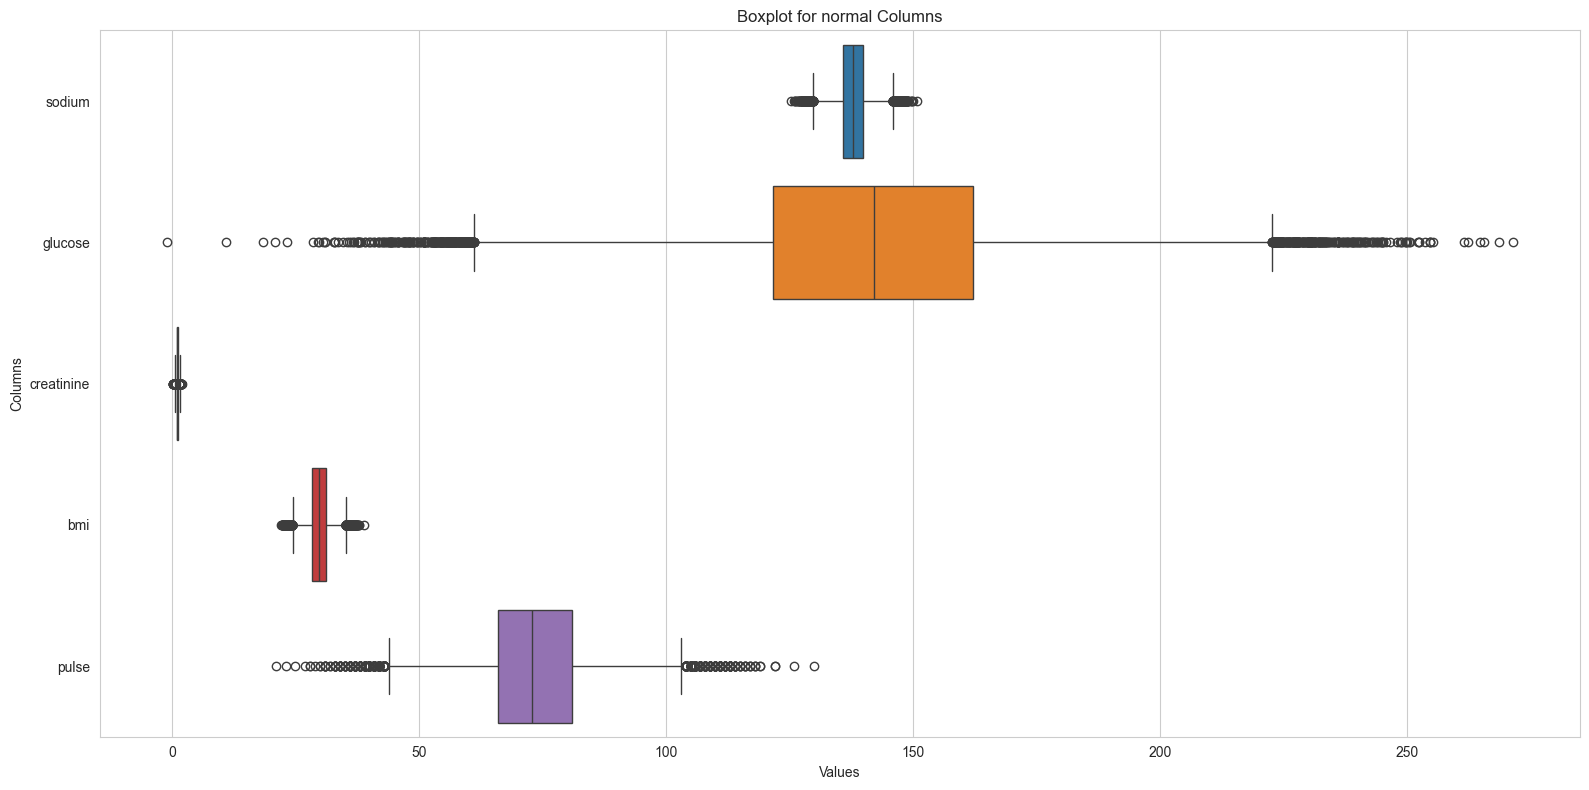

In [31]:
#Membuat visualisasi boxplot kolom normal di X train
sns.set_style("whitegrid")

fig, axes = plt.subplots(figsize=(16, 8)) 

# Boxplot for skewed columns
sns.boxplot(data=X_train[normal_dist], orient="h", ax=axes)
axes.set_title("Boxplot for normal Columns")
axes.set_xlabel("Values")
axes.set_ylabel("Columns")

# Display the plot
plt.tight_layout()
plt.show()

Didapatkan hasil persentase outlier di kolom distribusi normal, rata-rata semua bernilai dibawah 5%. Saya beranggapan bahwa hasil outlier uji lab ini, kemungkinan hasil error saat pembacaan data.

### Check outlier skew distribution

In [32]:
# Create function to calculate outlier percentages for skew
def calculate_outlier_percentages_skew(df, columns, distance):
    for variable in columns:
        IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
        lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
        upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

        outliers = df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)]
        outlier_percentage = len(outliers) / len(df) * 100

        print('Percentage of outliers in {}: {:.2f}%'.format(variable, outlier_percentage))



In [33]:
# Calcuate outlier percentages skewed and extreme skewed dist
print(calculate_outlier_percentages_skew(X_train, skewed_dist, 1.5))
print('')
print(calculate_outlier_percentages_skew(X_train, extreme_skewed_dist, 3))

Percentage of outliers in hematocrit: 5.64%
None

Percentage of outliers in neutrophils: 1.61%
Percentage of outliers in bloodureanitro: 7.48%
Percentage of outliers in secondarydiagnosisnonicd9: 1.04%
Percentage of outliers in number_of_issues: 1.10%
None


Terdapat beberapa kolom dengan persentase outlier berbeda-beda. Diantara semuanya, kolom `hematocrit` ,`bloodureanitro` memiliki persentase outlier diatas 5%. 

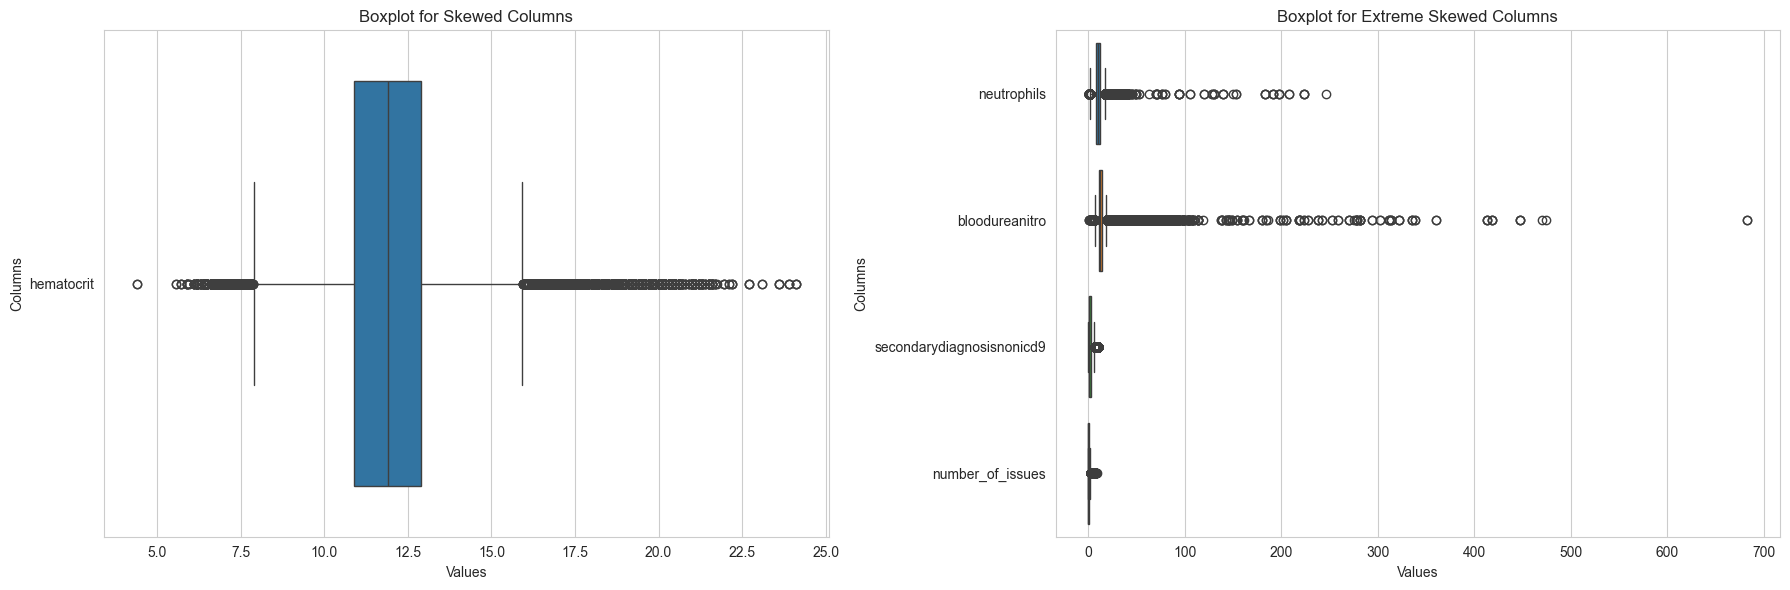

In [34]:
# Create a figure and two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 6)) # menampilkan grafik 1 baris 2 kolom

# Boxplot for skewed columns
sns.boxplot(data=X_train[skewed_dist], orient="h", ax=axes[0])
axes[0].set_title("Boxplot for Skewed Columns")
axes[0].set_xlabel("Values")
axes[0].set_ylabel("Columns")

# Boxplot for extreme skewed columns
sns.boxplot(data=X_train[extreme_skewed_dist], orient="h", ax=axes[1])
axes[1].set_title("Boxplot for Extreme Skewed Columns")
axes[1].set_xlabel("Values")
axes[1].set_ylabel("Columns")


# Display the plot
plt.tight_layout()
plt.show()

Saya akan apply metode capping ke semua kolom normal dan skewed untuk menjaga konsistensi data.

In [35]:
# Create function to apply winsorization for normal
def apply_winsorization_normal(train, test, variables, capping_method='gaussian', tail='both', fold=3):
    winsoriser = Winsorizer(capping_method=capping_method, tail=tail, fold=fold, variables=variables)
    train_capped = winsoriser.fit_transform(train)
    test_capped = winsoriser.transform(test)
    return train_capped, test_capped

# Create function to apply winsorization for skew
def apply_winsorization_skew(train, test, variables, capping_method='iqr', tail='both', fold=3):
    winsoriser = Winsorizer(capping_method=capping_method, tail=tail, fold=fold, variables=variables)
    train_capped = winsoriser.fit_transform(train)
    test_capped = winsoriser.transform(test)
    return train_capped, test_capped


In [36]:
# Apply to Train and test data
X_train_capped, X_test_capped = apply_winsorization_normal(X_train, X_test, normal_dist)
X_train_capped, X_test_capped = apply_winsorization_skew(X_train_capped, X_test_capped, skewed_dist, fold=1.5)
X_train_capped, X_test_capped = apply_winsorization_skew(X_train_capped, X_test_capped, extreme_skewed_dist, fold=3)

Proses capping berhasil dilakukan selanjutnya dicek lagi persentase outliernya.

In [37]:
#Menghitung persentase outlier pada kolom distribusi normal
calculate_outlier_percentages_normal(X_train_capped, normal_dist)

Percentage of outliers in sodium: 0.000%
Percentage of outliers in glucose: 0.000%
Percentage of outliers in creatinine: 0.000%
Percentage of outliers in bmi: 0.000%
Percentage of outliers in pulse: 0.000%


In [38]:
#Menghitung persentase outlier pada kolom distribusi skewed
calculate_outlier_percentages_skew(X_train_capped, skewed_dist, 1.5)

Percentage of outliers in hematocrit: 0.00%


In [39]:
#Menghitung persentase outlier pada kolom distribusi extreme skewed
calculate_outlier_percentages_skew(X_train_capped, extreme_skewed_dist, 3)

Percentage of outliers in neutrophils: 0.00%
Percentage of outliers in bloodureanitro: 0.00%
Percentage of outliers in secondarydiagnosisnonicd9: 0.00%
Percentage of outliers in number_of_issues: 0.00%


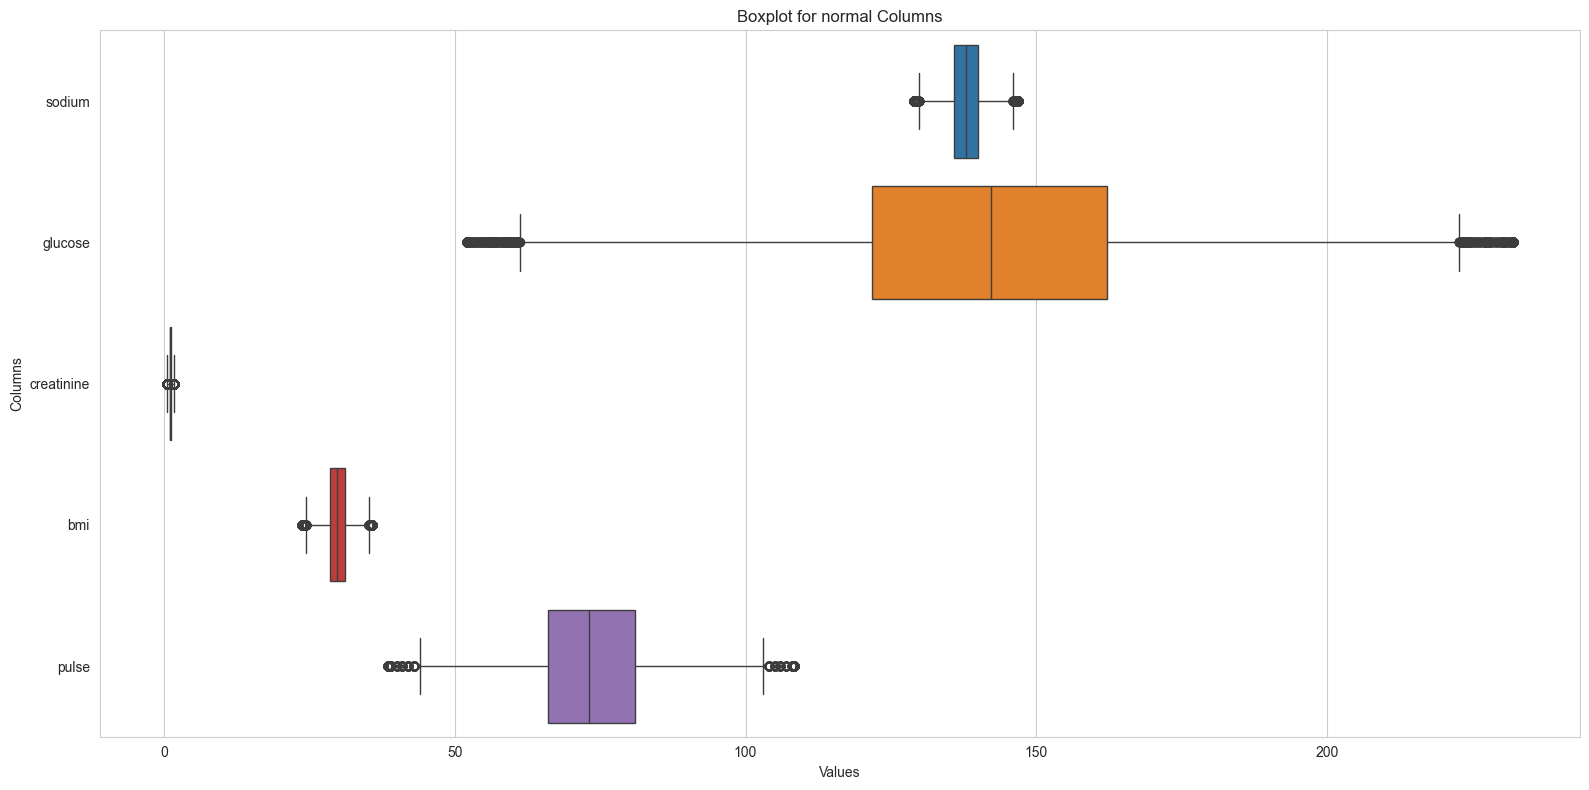

In [40]:
#Membuat visualisasi boxplot kolom normal di X train
sns.set_style("whitegrid")

fig, axes = plt.subplots(figsize=(16, 8)) 

# Boxplot for skewed columns
sns.boxplot(data=X_train_capped[normal_dist], orient="h", ax=axes)
axes.set_title("Boxplot for normal Columns")
axes.set_xlabel("Values")
axes.set_ylabel("Columns")

# Display the plot
plt.tight_layout()
plt.show()

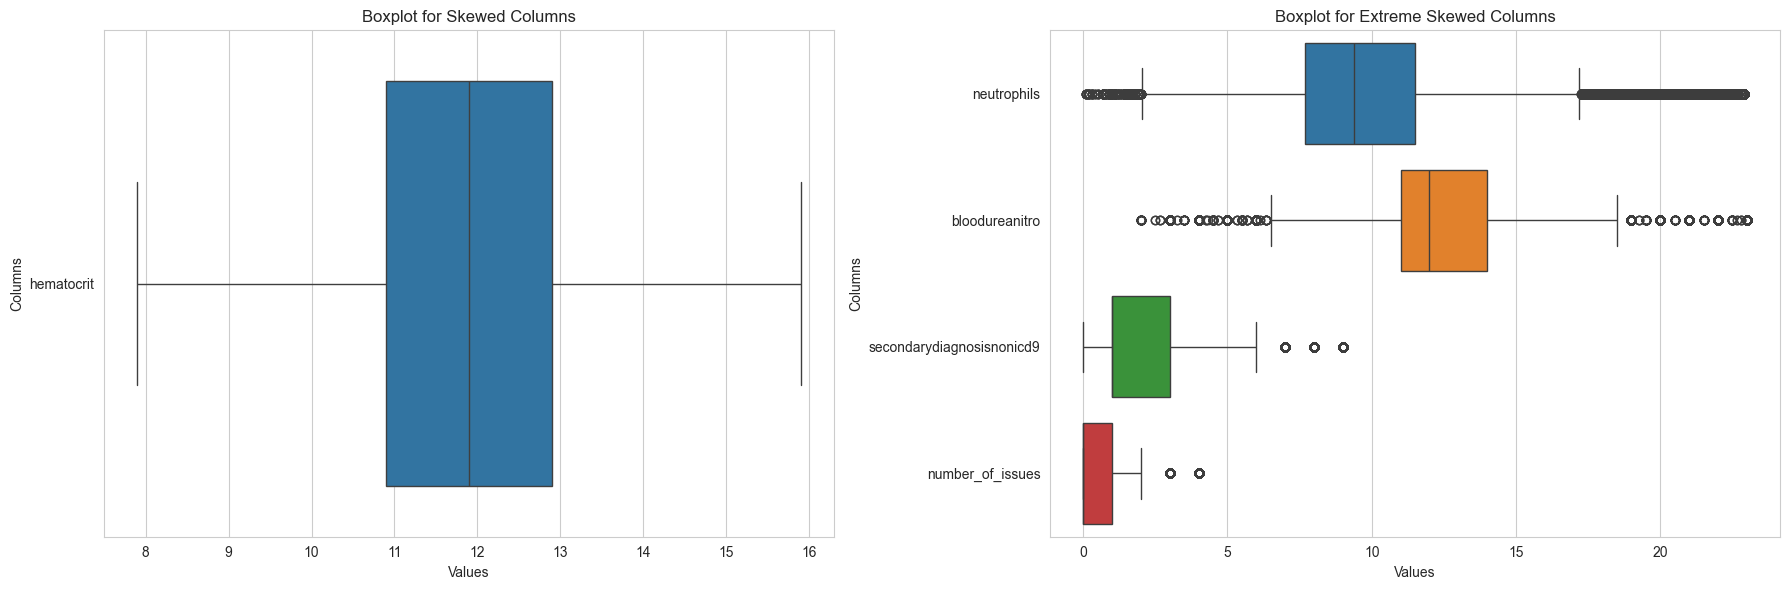

In [41]:
# Create a figure and two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 6)) # menampilkan grafik 1 baris 2 kolom

# Boxplot for skewed columns
sns.boxplot(data=X_train_capped[skewed_dist], orient="h", ax=axes[0])
axes[0].set_title("Boxplot for Skewed Columns")
axes[0].set_xlabel("Values")
axes[0].set_ylabel("Columns")

# Boxplot for extreme skewed columns
sns.boxplot(data=X_train_capped[extreme_skewed_dist], orient="h", ax=axes[1])
axes[1].set_title("Boxplot for Extreme Skewed Columns")
axes[1].set_xlabel("Values")
axes[1].set_ylabel("Columns")
# Display the plot
plt.tight_layout()
plt.show()

Hasil terlihat setelah dilakukan handling outlier dengan capping, outlier pada data sudah berkurang. Walaupun begitu, bentuk distribusi tidak signifikan berubah pada data kolom numerical yg berbentuk distribusi skewed. Selanjutnya melakukan feature selection.

## Feature selection

Dilakukan pemilihan feature dengan memilih kolom yg ber korelasi dengan target dan feature yg redundant untuk modelling yg optimal

In [42]:
# Concatenate X_train and y_train
concat_train = pd.concat([X_train_capped, y_train], axis=1) #menggabungkan data X_train dan y_train

# Show X_train
concat_train.head()

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,facid,number_of_issues,lengthofstay
61661,0,F,0,0,0,0,0,0,0,0,...,124.390952,12.0,1.151839,29.851992,83.0,6.5,3,B,0,1
16253,4,F,0,0,0,0,0,1,0,0,...,172.718824,7.0,1.030043,26.756122,55.0,6.5,1,E,1,8
15824,4,F,0,0,0,0,0,1,0,0,...,123.096855,12.0,0.847267,32.205301,85.0,6.5,9,E,1,8
3017,0,F,0,0,0,0,0,0,1,0,...,117.286192,5.0,1.135171,29.278599,90.0,6.4,1,A,2,5
94503,4,F,0,0,0,0,0,1,0,0,...,114.065522,15.0,1.100321,30.478918,60.0,7.0,1,E,1,7


In [43]:
#Cek list column di concat_train
concat_train.columns.to_list()

['rcount',
 'gender',
 'dialysisrenalendstage',
 'asthma',
 'irondef',
 'pneum',
 'substancedependence',
 'psychologicaldisordermajor',
 'depress',
 'psychother',
 'fibrosisandother',
 'malnutrition',
 'hemo',
 'hematocrit',
 'neutrophils',
 'sodium',
 'glucose',
 'bloodureanitro',
 'creatinine',
 'bmi',
 'pulse',
 'respiration',
 'secondarydiagnosisnonicd9',
 'facid',
 'number_of_issues',
 'lengthofstay']

Pakai korelasi phi_k untuk menghitung korelasi nya

In [44]:
# Create function to correlate variables with default using phik correlation
def compute_phik_correlation(dataframe, columns, target, num_col):
    subset = dataframe[columns]
    correlation_matrix = subset.phik_matrix(interval_cols=num_col)
    return correlation_matrix[target]

# Define the list of columns for each subset
num_col = [
 'hematocrit',
 'neutrophils',
 'sodium',
 'glucose',
 'bloodureanitro',
 'creatinine',
 'bmi',
 'pulse',
 'respiration',
 'secondarydiagnosisnonicd9',
 'number_of_issues',]
columns = concat_train.columns.to_list()
target = ['lengthofstay']

# Compute Phi-K correlation for each set of columns and print
correlation = compute_phik_correlation(concat_train, columns, target, num_col)

# Print result
print(correlation)

                            lengthofstay
rcount                          0.731530
gender                          0.086096
dialysisrenalendstage           0.204321
asthma                          0.145765
irondef                         0.252770
pneum                           0.166873
substancedependence             0.202618
psychologicaldisordermajor      0.422254
depress                         0.176923
psychother                      0.224328
fibrosisandother                0.082168
malnutrition                    0.208345
hemo                            0.257922
hematocrit                      0.256990
neutrophils                     0.217639
sodium                          0.131493
glucose                         0.131747
bloodureanitro                  0.258592
creatinine                      0.128731
bmi                             0.129107
pulse                           0.127269
respiration                     0.237509
secondarydiagnosisnonicd9       0.008786
facid           

## Cardinality handling

High cardinality can impact encoding proccess. Check cardinality in categorical column to see which has high cardinality. 

In [45]:
#Cardinality check
cat_col = ['rcount',
 'gender',
 'dialysisrenalendstage',
 'asthma',
 'irondef',
 'pneum',
 'substancedependence',
 'psychologicaldisordermajor',
 'depress',
 'psychother',
 'fibrosisandother',
 'malnutrition',
 'hemo',
 'facid']

for col in cat_col:
    print(f"Jumlah unique value {col}: {len(X_train_capped[col].unique())}")

Jumlah unique value rcount: 6
Jumlah unique value gender: 2
Jumlah unique value dialysisrenalendstage: 2
Jumlah unique value asthma: 2
Jumlah unique value irondef: 2
Jumlah unique value pneum: 2
Jumlah unique value substancedependence: 2
Jumlah unique value psychologicaldisordermajor: 2
Jumlah unique value depress: 2
Jumlah unique value psychother: 2
Jumlah unique value fibrosisandother: 2
Jumlah unique value malnutrition: 2
Jumlah unique value hemo: 2
Jumlah unique value facid: 5


Hasil korelasi dan cardinality handling, rata-rata kolom memiliki nilai korelasi yg cukup rendah walaupun ada kolom dengan korelasi yg tinggi seperti `rcount` dan `number_of_issues`. Cardinality check pada kolom kategorikal semuanya menunjukkan hasil yg tergolong rendah. Hasil pertimbangan, disini saya akan drop feature yg korelasinya dibawah 0.2.

In [46]:
#Drop columns
X_train_capped = X_train_capped.drop(columns=['gender', 'asthma', 'pneum', 'depress', 'fibrosisandother', 'sodium', 'glucose', 'creatinine', 'bmi', 'pulse', 'secondarydiagnosisnonicd9'])
X_test_capped = X_test_capped.drop(columns=['gender', 'asthma', 'pneum', 'depress', 'fibrosisandother', 'sodium', 'glucose', 'creatinine', 'bmi', 'pulse', 'secondarydiagnosisnonicd9'])

#show data
X_train_capped.head()

,rcount,dialysisrenalendstage,irondef,substancedependence,psychologicaldisordermajor,psychother,malnutrition,hemo,hematocrit,neutrophils,bloodureanitro,respiration,facid,number_of_issues
61661,0,0,0,0,0,0,0,0,11.9,9.4,12.0,6.5,B,0
16253,4,0,0,0,1,0,0,0,11.9,9.4,7.0,6.5,E,1
15824,4,0,0,0,1,0,0,0,11.9,9.4,12.0,6.5,E,1
3017,0,0,0,0,0,0,0,1,8.5,8.4,5.0,6.4,A,2
94503,4,0,0,0,1,0,0,0,14.1,7.7,15.0,7.0,E,1


## Multicollinearity check

Check if there are Multicollinearity between independent variables. By using variance inflation factor, if the value are more than 10 then its an indication there are multicollinearity.

In [47]:
# Create a function to calculate Variance Inflation Factor

def calculate_vif(X):
    """
    Calculate Variance Inflation Factor (VIF) for each independent variable in a DataFrame.
    
    Parameters:
    df (pd.DataFrame): A DataFrame containing only independent variables (no target column).
    
    Returns:
    pd.DataFrame: A DataFrame with two columns: 'Variable' and 'VIF'.
    """
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data


In [48]:
#Calucalate VIF between indepentent variable
num_col = X_train_capped.select_dtypes(include=np.number).columns.to_list()

calculate_vif(X_train_capped[num_col])

,Variable,VIF
0,dialysisrenalendstage,1.445819
1,irondef,2.012673
2,substancedependence,1.544084
3,psychologicaldisordermajor,3.884713
4,psychother,1.672453
5,malnutrition,1.660824
6,hemo,1.826825
7,hematocrit,46.490377
8,neutrophils,7.822951
9,bloodureanitro,12.000422


Berdasarkan hasil diatas, didapat beberapa kolom memiliki nilai VIF diatas 10 yaitu `hematocrit`, `bloodureanitro`, `respiration`, dan `number_of_issues`. Disini saya akan mencoba menurunkan nilai VIF dibawah 10 sehingga Multicolinearity menjadi rendah. Saya akan mencoba drop 2 kolom nilai VIF teratas.

In [49]:
# Drop 2 columns and check Multicolinearity 
calculate_vif(X_train_capped[num_col].drop(columns=['hematocrit', 'respiration']))

,Variable,VIF
0,dialysisrenalendstage,1.426221
1,irondef,2.004977
2,substancedependence,1.542523
3,psychologicaldisordermajor,3.844228
4,psychother,1.623969
5,malnutrition,1.637663
6,hemo,1.765114
7,neutrophils,4.547823
8,bloodureanitro,5.881068
9,number_of_issues,12.118367


Terlihat nilai VIF di beberapa kolom menurun. Lalu, walaupun kolom `number_of_issues` memiliki nilai diatas 10, kolom ini  merupakan indikasi seberapa parah kondisi pasien dari tingkat isu nya. Selain itu, `number_of_issues` memiliki korelasi yg cukup tinggi dengan target, maka saya akan drop column dari nilai korelasi rendah yaitu `dialysisrenalendstage`, `substancedependence`.

In [50]:
# Drop 2 columns again and check Multicolinearity 
calculate_vif(X_train_capped[num_col].drop(columns=['hematocrit', 'respiration', 'dialysisrenalendstage', 'substancedependence']))

,Variable,VIF
0,irondef,1.791022
1,psychologicaldisordermajor,3.024165
2,psychother,1.556479
3,malnutrition,1.520555
4,hemo,1.620997
5,neutrophils,4.487458
6,bloodureanitro,5.807698
7,number_of_issues,7.692609


Berdasarkan nilai VIF diatas, feature numerical sudah berada dibawah 10 yg berarti Multicolinearility antar independent varible nya rendah. Disini saya feature selection untuk jenis numerical akan berdasarkan hasil diatas.

In [51]:
#Drop columns X train and X test
X_train_capped = X_train_capped.drop(columns=['dialysisrenalendstage', 'substancedependence', 'hematocrit','respiration' ])
X_test_capped = X_test_capped.drop(columns=['dialysisrenalendstage', 'substancedependence', 'hematocrit','respiration' ])

#show data
X_train_capped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80000 entries, 61661 to 55047
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rcount                      80000 non-null  object 
 1   irondef                     80000 non-null  int64  
 2   psychologicaldisordermajor  80000 non-null  int64  
 3   psychother                  80000 non-null  int64  
 4   malnutrition                80000 non-null  int64  
 5   hemo                        80000 non-null  int64  
 6   neutrophils                 80000 non-null  float64
 7   bloodureanitro              80000 non-null  float64
 8   facid                       80000 non-null  object 
 9   number_of_issues            80000 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 6.7+ MB


## Split num col and cat col

Splitting the data columns based on their type

In [52]:
#Split columns into numerical and categorical (nominal and ordinal)
num = ['hemo', 'neutrophils', 'bloodureanitro', 'number_of_issues']
cat_nom = ['irondef', 'psychologicaldisordermajor', 'psychother', 'malnutrition' ]
cat_ord = ['rcount', 'facid']

## Feature Scaling and Encoding

Bagian ini akan dilakukan feature scaling dan encoding dengan metode pipeline. Pada proses sebelumnya diketahui terdapat sebagian outlier disaat handling outlier, maka Scaler pakai RobustScaler(). Lalu encoder pakai onehot dan ordinal encoder. Selain itu, diketahui dari hasil analisa variable independent dan variable dependent tidak ada hubungan yg linear. Maka dari itu, saya meng konversi data ke polynomial features menggunakan PolynomialFeatures bertujuan optimasisai saat pakai Linear Regression.

In [53]:
#PolynomialFeatures
poly_d2 = PolynomialFeatures(degree=2, include_bias=False)

#Feature scaling
scaler = RobustScaler()

# Pipeline untuk data numeric
num_pipeline = make_pipeline(scaler, poly_d2)

#Feature encoding
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False) # sparse_output(atau sparse aja)=False utk mengganti -> `.toarray()`
ord = OrdinalEncoder(categories=[['0', '1', '2', '3', '4', '5+'],
                                 ['A', 'B', 'C', 'D', 'E']])


#Column tranformer untuk scaling dan encoding 
preprocess = ColumnTransformer(
    transformers = [
        ('num_scaler', num_pipeline, num),
        ('ohe_encoding', ohe, cat_nom),
        ('ord_encoding', ord, cat_ord)],
    remainder='passthrough' # untuk categorical yg sdh di encode
)

# vi. Model Definition

Bagian ini akan dilakukan pendefinisian model dengan menggunakan algoritma LinearRegression

In [54]:
#Define model with pipeline
pipe_linreg = make_pipeline(preprocess, LinearRegression())
pipe_lasso = make_pipeline(preprocess, Lasso(random_state=76))
pipe_ridge = make_pipeline(preprocess, Ridge(random_state=76))
pipe_elnet = make_pipeline(preprocess, ElasticNet(random_state=76))
pipe_dtr = make_pipeline(preprocess, DecisionTreeRegressor(random_state=76))
pipe_xgb = make_pipeline(preprocess, XGBRegressor(eval_metric=r2_score))

# vii. Model training

Pada bagian ini akan dilakukan model training dengan algoritma model untuk regression. Saya pakai algoritma Linear Regression dengan metode polynomialFeatures sebelumnya yg sudah mengubah dataset ke polynomial Features. Saya akan menggunakan algoritma tree-based yg dimana mampu mencari interaksi dan non-linearitas dari dataset, algoritma yg saya pakai Decision Tree regressor. Saya juga akan pakai algoritma boosting yg berguna untuk meningkatkan akurasi model dan mampu meng handle hubungan kompleks antar variabel, disini saya pakai XGBoost.

In [55]:
#Model training with linear regression
pipe_linreg.fit(X_train_capped, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_scaler',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['hemo', 'neutrophils',
                                                   'bloodureanitro',
                                                   'number_of_issues']),
                                                 ('ohe_encoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['irondef',
                                                   'psychologicaldisordermajor',
                                                   'psychother',
                                                   'malnutrition']),
                                                 ('ord_encoding',
                                                  OrdinalEncoder(categories=[['0',
                                                                              '1',
                                                                              '2',
                                                                              '3',
                                                                              '4',
                                                                              '5+'],
                                                                             ['A',
                                                                              'B',
                                                                              'C',
                                                                              'D',
                                                                              'E']]),
                                                  ['rcount', 'facid'])])),
                ('linearregression', LinearRegression())])

In [56]:
#Model training with Lasso
pipe_lasso.fit(X_train_capped, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_scaler',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['hemo', 'neutrophils',
                                                   'bloodureanitro',
                                                   'number_of_issues']),
                                                 ('ohe_encoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['irondef',
                                                   'psychologicaldisordermajor',
                                                   'psychother',
                                                   'malnutrition']),
                                                 ('ord_encoding',
                                                  OrdinalEncoder(categories=[['0',
                                                                              '1',
                                                                              '2',
                                                                              '3',
                                                                              '4',
                                                                              '5+'],
                                                                             ['A',
                                                                              'B',
                                                                              'C',
                                                                              'D',
                                                                              'E']]),
                                                  ['rcount', 'facid'])])),
                ('lasso', Lasso(random_state=76))])

In [57]:
#Model training with Ridge
pipe_ridge.fit(X_train_capped, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_scaler',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['hemo', 'neutrophils',
                                                   'bloodureanitro',
                                                   'number_of_issues']),
                                                 ('ohe_encoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['irondef',
                                                   'psychologicaldisordermajor',
                                                   'psychother',
                                                   'malnutrition']),
                                                 ('ord_encoding',
                                                  OrdinalEncoder(categories=[['0',
                                                                              '1',
                                                                              '2',
                                                                              '3',
                                                                              '4',
                                                                              '5+'],
                                                                             ['A',
                                                                              'B',
                                                                              'C',
                                                                              'D',
                                                                              'E']]),
                                                  ['rcount', 'facid'])])),
                ('ridge', Ridge(random_state=76))])

In [58]:
#Model training with ElasticNet
pipe_elnet.fit(X_train_capped, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_scaler',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['hemo', 'neutrophils',
                                                   'bloodureanitro',
                                                   'number_of_issues']),
                                                 ('ohe_encoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['irondef',
                                                   'psychologicaldisordermajor',
                                                   'psychother',
                                                   'malnutrition']),
                                                 ('ord_encoding',
                                                  OrdinalEncoder(categories=[['0',
                                                                              '1',
                                                                              '2',
                                                                              '3',
                                                                              '4',
                                                                              '5+'],
                                                                             ['A',
                                                                              'B',
                                                                              'C',
                                                                              'D',
                                                                              'E']]),
                                                  ['rcount', 'facid'])])),
                ('elasticnet', ElasticNet(random_state=76))])

In [59]:
#Model training with DecisionTree regressor
pipe_dtr.fit(X_train_capped, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_scaler',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['hemo', 'neutrophils',
                                                   'bloodureanitro',
                                                   'number_of_issues']),
                                                 ('ohe_encoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['irondef',
                                                   'psychologicaldisordermajor',
                                                   'psychother',
                                                   'malnutrition']),
                                                 ('ord_encoding',
                                                  OrdinalEncoder(categories=[['0',
                                                                              '1',
                                                                              '2',
                                                                              '3',
                                                                              '4',
                                                                              '5+'],
                                                                             ['A',
                                                                              'B',
                                                                              'C',
                                                                              'D',
                                                                              'E']]),
                                                  ['rcount', 'facid'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=76))])

In [60]:
#Model training with XGB regressor
pipe_xgb.fit(X_train_capped, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_scaler',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['hemo', 'neutrophils',
                                                   'bloodureanitro',
                                                   'number_of_issues']),
                                                 ('ohe_encoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=Fal...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

# viii. Model evaluation

Dicari model terbaik dengan melihat hasil performanya dari serangkaian metrics yaitu MAE, MSE, RMSE, dan R2 score.

In [61]:
#Fungsi untuk menghitung dari hasil evaluasi

#Define hasil evaluasi
eval_results = {
    'name': [],
    'MAE - Train': [],
    'MAE - Test': [],
    'MSE - Train': [],
    'MSE - Test': [],
    'RMSE - Train': [],
    'RMSE - Test': [],
    'R2 Score - Train': [],
    'R2 Score - Test': []
}

def model_evaluation(name, model, X_train, X_test, y_train, y_test):
  ''' 
  Fungsi ini untuk menghitung hasil evaluasi performa model dengan menghitung error dan r2 score.
  Argument name berupa string, model berupa variable model, X_train variable X train final, X_test variable X test final,
  y_train vaiable y train, y_test variable y test.
  '''
  # Predict Train-Set and Test-Set
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  # Model evaluation using different metrics
  mae_train = mean_absolute_error(y_train, y_pred_train)
  mae_test = mean_absolute_error(y_test, y_pred_test)

  mse_train = mean_squared_error(y_train, y_pred_train)
  mse_test = mean_squared_error(y_test, y_pred_test)

  rmse_train = root_mean_squared_error(y_train, y_pred_train)
  rmse_test = root_mean_squared_error(y_test, y_pred_test)

  r2score_train = r2_score(y_train, y_pred_train)
  r2score_test = r2_score(y_test, y_pred_test)

  # Save into dictionary
  eval_results['name'].append(name)
  eval_results['MAE - Train'].append(round(mae_train, 2))
  eval_results['MAE - Test'].append(round(mae_test, 2))
  eval_results['MSE - Train'].append(round(mse_train, 2))
  eval_results['MSE - Test'].append(round(mse_test, 2))
  eval_results['RMSE - Train'].append(round(rmse_train, 2))
  eval_results['RMSE - Test'].append(round(rmse_test, 2))
  eval_results['R2 Score - Train'].append(round(r2score_train, 2))
  eval_results['R2 Score - Test'].append(round(r2score_test, 2))

In [62]:
# Fungsi untuk menghitung residual (multivariate normality)

def residuePlot(model, X_test):
    y_pred_test = model.predict(X_test)
    residuals = y_test - y_pred_test
    
    # Display QQ plot
    sm.qqplot(residuals, line ='45')
    plt.show()
    
    #Find upper and lower
    Q1 = residuals.quantile(0.25)
    Q3 = residuals.quantile(0.75)
    IQR = Q3 - Q1
    up_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    
    #plot distribution residual
    print('--- Residual Statistics ---')
    print('Residual Mean:', residuals.mean())
    print('Residual Median:', residuals.median())
    print('Residual Skewness:', residuals.skew())

    # Calculate upper and lower boundaries
    upper_boundary = up_bound
    lower_boundary = lower_bound
    # percentage of outliers
    overestimated = (residuals > upper_boundary).sum()
    underestimated = (residuals < lower_boundary).sum()
    total = len(residuals)

    print('--- Dispersion of residual ---')
    print('Residual upper boundary:', upper_boundary)
    print('Residual lower boundary:', lower_boundary)
    print(f'Percentage of Overestimated: {overestimated/ total:.2%}')
    print(f'Percentage of Underestimated: {underestimated / total:.2%}')

    # Residual Distribution
    sns.histplot(residuals, bins=50, kde=True)
    # vertical line showing upper and lower boundary
    plt.axvline(upper_boundary, color='r', linestyle='--')
    plt.axvline(lower_boundary, color='r', linestyle='--')
    plt.xlabel('Residuals')
    plt.title('Residual Distribution')
    plt.show()

In [63]:
#Evaluate model linear regression
model_evaluation('LinearRegression', pipe_linreg, X_train_capped, X_test_capped, y_train, y_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

name,LinearRegression
MAE - Train,0.84
MAE - Test,0.83
MSE - Train,1.23
MSE - Test,1.23
RMSE - Train,1.11
RMSE - Test,1.11
R2 Score - Train,0.78
R2 Score - Test,0.78


Berdasarkan hasil diatas, performa model Linear regression memiliki performa yg bagus dan bisa dikatakan **good-fit** karena angka r2 score mendekati 0.8 dan nilai train dan test memiliki nilai yg sama. Error pada data train dan test pakai MAE terbagus diantara yg lain karena memiliki nilai error yg terendah.

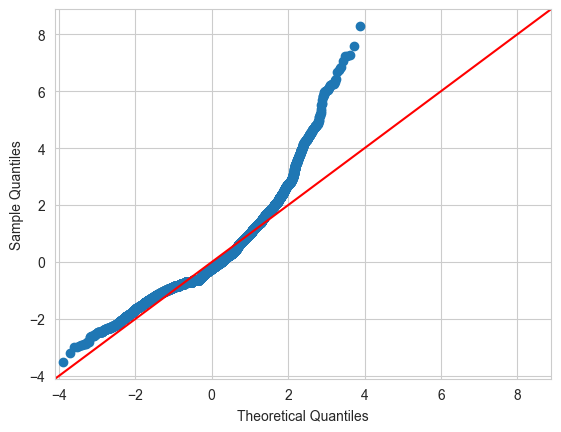

--- Residual Statistics ---
Residual Mean: -0.003173823557102479
Residual Median: -0.22634813195262415
Residual Skewness: 1.3870744231050274
--- Dispersion of residual ---
Residual upper boundary: 2.4259569235912886
Residual lower boundary: -2.6006454337008753
Percentage of Overestimated: 3.12%
Percentage of Underestimated: 0.07%


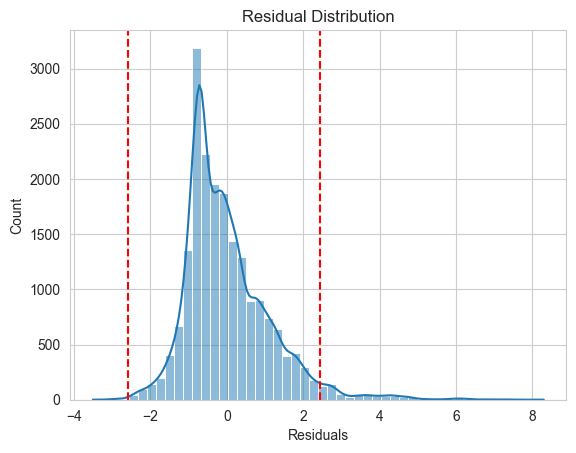

In [64]:
#Cek residual
residuePlot(pipe_linreg, X_test_capped)

Berdasarkan hasil residual diatas:
- Model bersifat heteroskedasticity karena melihat nilai variansi yg berubah-ubah dari prediksi rendah ke besar.
- Melihat dari nilai skewness, model cenderung kesusahan memprediksi nilai yg tinggi dan terbukti dari persentase overestimates di angka 3.12%.
- Melihat dari persentase underestimted, model cenderung baik jika memprediksi nilai yg rendah artinya jika prediksi tidak tinggi maka kemungkinan kecil prediksi akan dibawahnya.
- Kelebihan model dari hasil diatas adalah model baik saat memprediksi nilai yg rendah seperti 2 atau 3 hari karena kemungkinan kecil underestimated, tetapi kekurangan nya model tidak cukup baik jika memprediksi nilai tinggi seperti 12 atau 14 hari karena kemungkinan nilai prediksi ini overestimated dan nilai aktual lebih kecil.

In [65]:
#Evaluate model L1 Regression
model_evaluation('Lasso', pipe_lasso, X_train_capped, X_test_capped, y_train, y_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

name,LinearRegression,Lasso
MAE - Train,0.84,1.17
MAE - Test,0.83,1.16
MSE - Train,1.23,2.25
MSE - Test,1.23,2.23
RMSE - Train,1.11,1.50
RMSE - Test,1.11,1.49
R2 Score - Train,0.78,0.60
R2 Score - Test,0.78,0.60


Berdasarkan hasil diatas, performa model Lasso memiliki performa tidak jelek dan angka r2 score nilai train dan test memiliki nilai yg sama, tetapi nilai R2 score yg cukup jauh dibawah 0.8 model ini lebih dikatakan ke **underfit**. Error pada data train dan test pakai MAE terbagus diantara yg lain karena memiliki nilai error yg terendah. Dibanding Linear regression, model lebih jelek karena nilai eror dan r2 score dibawahnya.

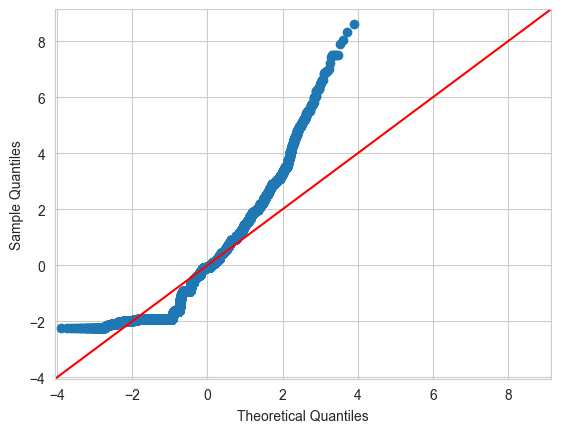

--- Residual Statistics ---
Residual Mean: 0.0026330548102947867
Residual Median: -0.0537320629543796
Residual Skewness: 0.7710534845630101
--- Dispersion of residual ---
Residual upper boundary: 3.7766427176806783
Residual lower boundary: -3.8658783750828145
Percentage of Overestimated: 1.52%
Percentage of Underestimated: 0.00%


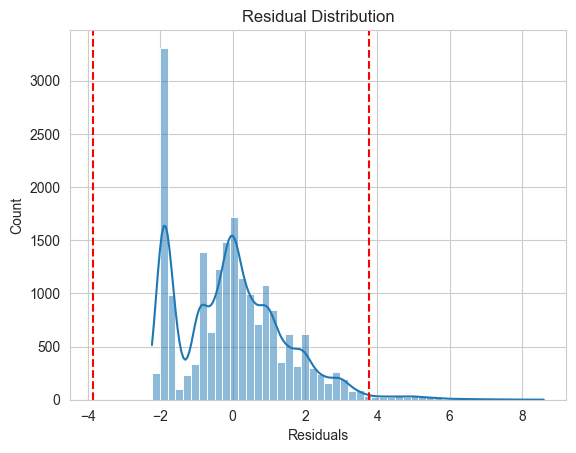

In [66]:
#Cek residual
residuePlot(pipe_lasso, X_test_capped)

Berdasarkan hasil residual diatas:
- Model bersifat heteroskedasticity karena melihat nilai variansi yg berubah-ubah dari prediksi rendah ke besar.
- Melihat dari nilai skewness, model cenderung kesusahan memprediksi nilai yg tinggi dan terbukti dari persentase overestimates di angka 1.52%. Walau rendah, tetapi upper boundary berada di angka 3, yg artinya kemungkinan prediksi overestimate hanya 1.52% tetapi jika ada salah prediksi maka aktual nya bisa lebih 3 hari.
- Melihat dari persentase underestimted, model cenderung baik jika memprediksi nilai yg rendah artinya jika prediksi tidak tinggi, maka kemungkinan kecil prediksi akan dibawahnya.
- Kelebihan model dari hasil diatas adalah model baik saat memprediksi nilai yg rendah seperti 2 atau 3 hari karena kemungkinan kecil underestimated, tetapi kekurangan nya model tidak cukup baik jika memprediksi nilai tinggi seperti 12 atau 14 hari karena kemungkinan nilai prediksi ini overestimated dan nilai aktual lebih kecil.

In [67]:
#Evaluate model L2 Regression
model_evaluation('Ridge', pipe_ridge, X_train_capped, X_test_capped, y_train, y_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

name,LinearRegression,Lasso,Ridge
MAE - Train,0.84,1.17,0.84
MAE - Test,0.83,1.16,0.83
MSE - Train,1.23,2.25,1.23
MSE - Test,1.23,2.23,1.23
RMSE - Train,1.11,1.50,1.11
RMSE - Test,1.11,1.49,1.11
R2 Score - Train,0.78,0.60,0.78
R2 Score - Test,0.78,0.60,0.78


Berdasarkan hasil diatas, performa model Ridge memiliki performa yg bagus sama seperti Linear regression dan bisa dikatakan **good-fit** karena angka r2 score mendekati 0.8 dan nilai train dan test memiliki nilai yg sama. Error pada data train dan test pakai MAE terbagus diantara yg lain karena memiliki nilai error yg terendah.

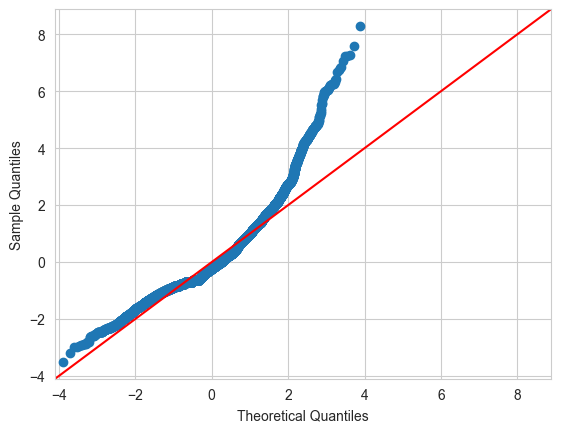

--- Residual Statistics ---
Residual Mean: -0.003173634768191621
Residual Median: -0.2263750779459528
Residual Skewness: 1.3870771305302532
--- Dispersion of residual ---
Residual upper boundary: 2.426093148403389
Residual lower boundary: -2.600752088190431
Percentage of Overestimated: 3.12%
Percentage of Underestimated: 0.07%


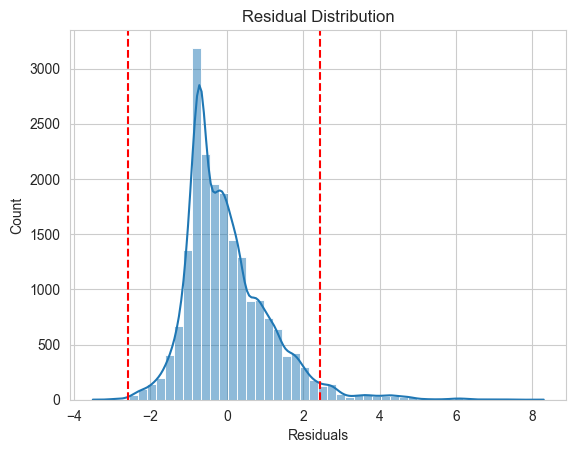

In [68]:
#Cek residual
residuePlot(pipe_ridge, X_test_capped)

Berdasarkan hasil residual diatas:
- Model memiliki sifat residual yg sama dengan Linear regression.
- Model bersifat heteroskedasticity karena melihat nilai variansi yg berubah-ubah dari prediksi rendah ke besar.
- Melihat dari nilai skewness, model cenderung kesusahan memprediksi nilai yg tinggi dan terbukti dari persentase overestimates di angka 3.12%.
- Melihat dari persentase underestimted, model cenderung baik jika memprediksi nilai yg rendah artinya jika prediksi tidak tinggi maka kemungkinan kecil prediksi akan dibawahnya.
- Kelebihan model dari hasil diatas adalah model baik saat memprediksi nilai yg rendah seperti 2 atau 3 hari karena kemungkinan kecil underestimated, tetapi kekurangan nya model tidak cukup baik jika memprediksi nilai tinggi seperti 12 atau 14 hari karena kemungkinan nilai prediksi ini overestimated dan nilai aktual lebih kecil.

In [69]:
#Evaluate model ElasticNet
model_evaluation('ElasticNet', pipe_elnet, X_train_capped, X_test_capped, y_train, y_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

name,LinearRegression,Lasso,Ridge,ElasticNet
MAE - Train,0.84,1.17,0.84,1.09
MAE - Test,0.83,1.16,0.83,1.07
MSE - Train,1.23,2.25,1.23,1.93
MSE - Test,1.23,2.23,1.23,1.91
RMSE - Train,1.11,1.50,1.11,1.39
RMSE - Test,1.11,1.49,1.11,1.38
R2 Score - Train,0.78,0.60,0.78,0.65
R2 Score - Test,0.78,0.60,0.78,0.65


Berdasarkan hasil diatas, performa model ElasticNet memiliki performa tidak jelek dan angka r2 score nilai train dan test memiliki nilai yg sama, tetapi nilai R2 score yg cukup jauh dibawah 0.8 model ini lebih dikatakan ke **underfit**. Error pada data train dan test pakai MAE terbagus diantara yg lain karena memiliki nilai error yg terendah. Dibanding Linear regression dan Ridge, model lebih jelek karena nilai eror dan r2 score dibawahnya. Tetapi masih sedikit lebih baik ketimbang model Lasso.

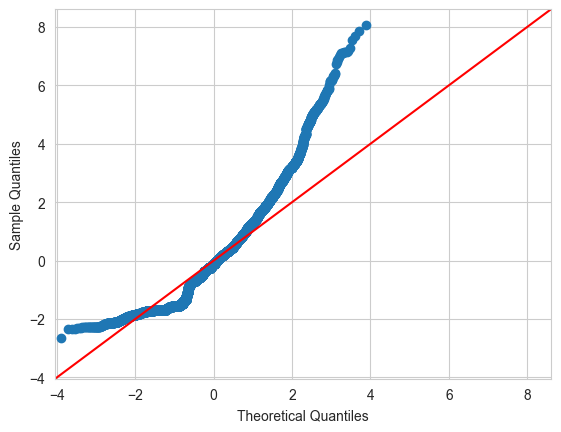

--- Residual Statistics ---
Residual Mean: 0.0022502622677601915
Residual Median: -0.12064763483292307
Residual Skewness: 0.9154147726574442
--- Dispersion of residual ---
Residual upper boundary: 3.5501605875438607
Residual lower boundary: -3.912920660780868
Percentage of Overestimated: 1.54%
Percentage of Underestimated: 0.00%


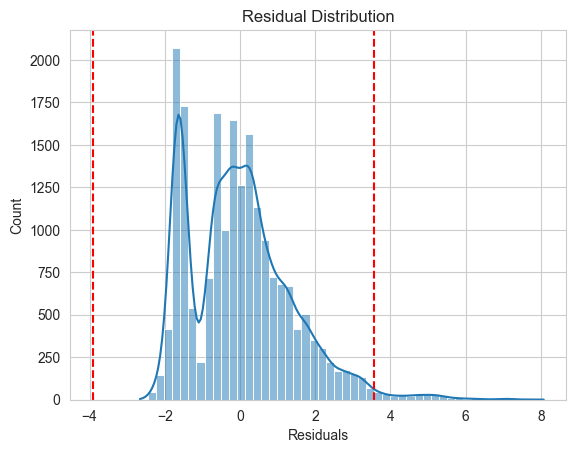

In [70]:
#Cek residual
residuePlot(pipe_elnet, X_test_capped)

Berdasarkan hasil residual diatas:
- Model ini memiliki nilai residual yg mempunyai sifat yg kurang lebih dari model lasso.
- Model bersifat heteroskedasticity karena melihat nilai variansi yg berubah-ubah dari prediksi rendah ke besar.
- Melihat dari nilai skewness, model cenderung kesusahan memprediksi nilai yg tinggi dan terbukti dari persentase overestimates di angka 1.54%. Walau rendah, tetapi upper boundary berada di angka ~3, yg artinya kemungkinan prediksi overestimate hanya 1.54% tetapi jika ada salah prediksi maka aktual nya bisa lebih ~3 hari.
- Melihat dari persentase underestimted, model cenderung baik jika memprediksi nilai yg rendah artinya jika prediksi tidak tinggi, maka kemungkinan kecil prediksi akan dibawahnya.
- Kelebihan model dari hasil diatas adalah model baik saat memprediksi nilai yg rendah seperti 2 atau 3 hari karena kemungkinan kecil underestimated, tetapi kekurangan nya model tidak cukup baik jika memprediksi nilai tinggi seperti 12 atau 14 hari karena kemungkinan nilai prediksi ini overestimated dan nilai aktual lebih kecil.

In [71]:
#Evaluate model DecisionTree Regressor
model_evaluation('DT Regressor', pipe_dtr, X_train_capped, X_test_capped, y_train, y_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

name,LinearRegression,Lasso,Ridge,ElasticNet,DT Regressor
MAE - Train,0.84,1.17,0.84,1.09,0.42
MAE - Test,0.83,1.16,0.83,1.07,0.89
MSE - Train,1.23,2.25,1.23,1.93,0.45
MSE - Test,1.23,2.23,1.23,1.91,1.64
RMSE - Train,1.11,1.50,1.11,1.39,0.67
RMSE - Test,1.11,1.49,1.11,1.38,1.28
R2 Score - Train,0.78,0.60,0.78,0.65,0.92
R2 Score - Test,0.78,0.60,0.78,0.65,0.70


Berdasarkan hasil diatas, model DT Regressor merupakan model yg **Over-Fit**, berbeda dengan model sebelumnya, hasil error pada train rendah tetapi pada test nilai error lebih tinggi, begitu juga pada nilai R2 score nya. Model ini kesusahan memprediksi saat di data test nya, tetapi bagus saat prediksi train nya.

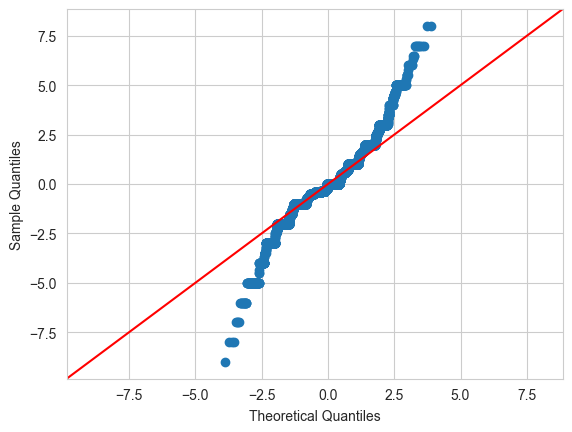

--- Residual Statistics ---
Residual Mean: -0.014972824940046715
Residual Median: 0.0
Residual Skewness: 0.2524333097585649
--- Dispersion of residual ---
Residual upper boundary: 2.413978494623655
Residual lower boundary: -2.337275985663082
Percentage of Overestimated: 3.45%
Percentage of Underestimated: 2.63%


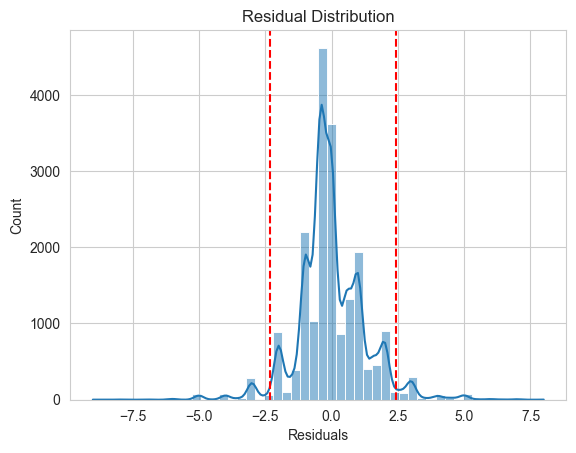

In [72]:
#Cek residual
residuePlot(pipe_dtr, X_test_capped)

Berdasarkan hasil residual diatas:
- Model bersifat heteroskedasticity karena melihat nilai variansi yg berubah-ubah dari prediksi rendah ke besar.
- Melihat dari nilai skewness, model cukup bagus memprediksi dan hasilnya tidak terlalu bias karena nilai median nya di 0.2 yg artinya prediksi terdistribusi normal.
- Melihat dari persentase underestimated, model memiliki persentase prediksi 2.63% nilai nya terlalu kecil . Artinya jika prediksi 2 atau 3 hari, kemungkinan aktual nya adalah ~4 hari.
- Kelebihan model dari hasil diatas adalah model memiliki prediksi yg terdistribusi normal, artinya kemungkinan prediksi salah kecil. Tetapi, kekurangnan model ini memiliki persentase underestimated dan overestimated diatas model lain, artinya semua prediksi ada kemungkinan bisa overestimated maupun underestimated.

In [73]:
#Evaluate model XGB
model_evaluation('XGB', pipe_xgb, X_train_capped, X_test_capped, y_train, y_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

name,LinearRegression,Lasso,Ridge,ElasticNet,DT Regressor,XGB
MAE - Train,0.84,1.17,0.84,1.09,0.42,0.73
MAE - Test,0.83,1.16,0.83,1.07,0.89,0.78
MSE - Train,1.23,2.25,1.23,1.93,0.45,0.89
MSE - Test,1.23,2.23,1.23,1.91,1.64,1.04
RMSE - Train,1.11,1.50,1.11,1.39,0.67,0.95
RMSE - Test,1.11,1.49,1.11,1.38,1.28,1.02
R2 Score - Train,0.78,0.60,0.78,0.65,0.92,0.84
R2 Score - Test,0.78,0.60,0.78,0.65,0.70,0.81


Berdasarkan hasil diatas, performa model XGB memiliki performa terbaik dibanding model lainnya dan bisa dikatakan **good-fit** karena angka r2 score melebihi 0.8 tetapi nilai train sedikit lebih jelek daripada testnya. Error pada data train dan test pakai MAE terbagus diantara error yg lain karena memiliki nilai error yg terendah.

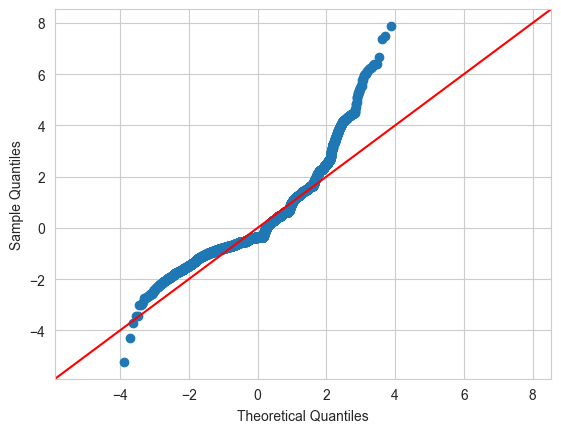

--- Residual Statistics ---
Residual Mean: -0.0041314961850643156
Residual Median: -0.3695336580276489
Residual Skewness: 1.5000549545411366
--- Dispersion of residual ---
Residual upper boundary: 2.203058183193207
Residual lower boundary: -2.376367151737213
Percentage of Overestimated: 3.61%
Percentage of Underestimated: 0.15%


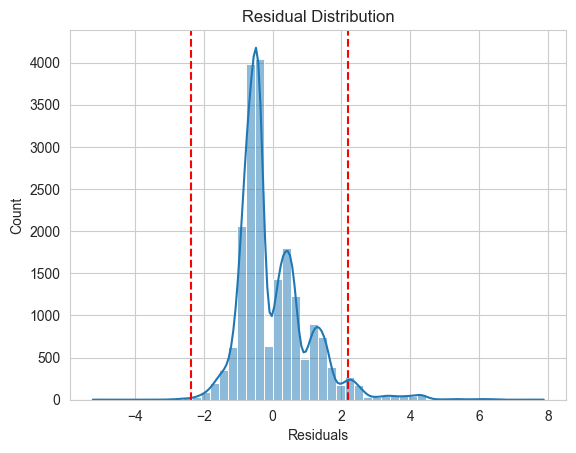

In [74]:
#Cek residual
residuePlot(pipe_xgb, X_test_capped)

Berdasarkan hasil residual diatas:
- Model memiliki sifat residual yg sama dengan Linear regression dan Ridge.
- Model bersifat heteroskedasticity karena melihat nilai variansi yg berubah-ubah dari prediksi rendah ke besar.
- Melihat dari nilai skewness, model cenderung kesusahan saat memprediksi di nilai yg tinggi dan terbukti dari persentase overestimates di angka 3.61%.
- Melihat dari persentase underestimated, model cenderung baik jika memprediksi nilai yg rendah artinya jika prediksi tidak tinggi, maka kemungkinan kecil prediksi akan dibawahnya.
- Kelebihan model dari hasil diatas adalah model baik saat memprediksi nilai yg rendah seperti 2 atau 3 hari karena kemungkinan kecil underestimated, tetapi kekurangan nya model tidak cukup baik jika memprediksi nilai tinggi seperti 12 atau 14 hari karena kemungkinan nilai prediksi ini overestimated dan nilai aktual lebih kecil.

In [75]:
# Extract the trained model from pipeline
linreg = pipe_linreg.named_steps["linearregression"]  
lasso = pipe_lasso.named_steps["lasso"]
ridge = pipe_ridge.named_steps["ridge"]
elnet = pipe_elnet.named_steps['elasticnet']

# Get coefficients & intercept for linear
coef_linreg = linreg.coef_
intercept_linreg = linreg.intercept_

# Get coefficients & intercept for lasso
coef_lasso = lasso.coef_
intercept_lasso = lasso.intercept_

# Get coefficients & intercept for ridge
coef_ridge = ridge.coef_
intercept_ridge = ridge.intercept_

# Get coefficients & intercept for elnet
coef_elnet = elnet.coef_
intercept_elnet = elnet.intercept_


In [76]:
# Compare the coefficients

print('Linear Regression')
print('Coefficients : ', coef_linreg)
print('Intercept    : ', intercept_linreg)
print('')

print('Lasso regression')
print('Coefficients : ', coef_lasso)
print('Intercept    : ', intercept_lasso)
print('')

print('Ridge regression')
print('Coefficients : ', coef_ridge)
print('Intercept    : ', intercept_ridge)
print('')

print('ElasticNet regression')
print('Coefficients : ', coef_elnet)
print('Intercept    : ', intercept_elnet)
print('')



Linear Regression
Coefficients :  [ 0.19637812 -0.08990749 -0.0386718   1.36169793  0.19637812  0.04526165
  0.051515    0.06773354  0.153133    0.00885782  0.00301608  0.0410605
  0.02039326 -0.24703875 -0.04089662  0.04089662 -0.08553728  0.08553728
 -0.09802486  0.09802486 -0.05885375  0.05885375  1.14915236  0.07574877]
Intercept    :  1.9145260829423538

Lasso regression
Coefficients :  [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.         -0.          0.02444927
  0.          0.14072984 -0.          0.         -0.          0.
 -0.          0.         -0.          0.          0.7290556   0.        ]
Intercept    :  2.9021358795405963

Ridge regression
Coefficients :  [ 0.19649313 -0.08991576 -0.03866223  1.36136394  0.19649313  0.04526223
  0.05150964  0.06765864  0.15313416  0.00885647  0.00301935  0.04106384
  0.02038682 -0.24695954 -0.04093142  0.04093142 -0.08555907  0.08555907
 -0.09800142  0.09800142 -0.05885054  0.

Diketahui bahwa:
- Coefficient merupakan nilai yg merepresentasikan seberapa penting feature tersebut dalam memprediksi variable target. Intercept merupakan hasil nilai prediksi jika semua feature bernilai 0.
- Lasso regression menerapkan L1 regularization, dimana model ini menerapkan penalty sampai 0 ke feature nya. Perbandingan dengan linear regression, coefficient pada lasso ada yg 0 artinya model lasso mengganggap feature ini tidak penting. Nilai intercept lebih kecil dari Linear regression karena adanya penalty di L1.
- Ridge regression menerapkan L2 regularization, dimana model ini menerapkan penalty ke feature tapi tidak sampai 0. Perbandingan dengan linear regression, coefficient pada ridge memiliki nilai yg sama pada kedua model artinya model ini mengganggap feature yg sama penting. Intercept juga nilai sama dengan Linear regression.
ElasticNet menerapkan kombinasi L1 dan L2 regularization, dimana model ini menerapkan rasio kedua regularization. ElasticNet menggangap beberapa feature 0 artinya ada beberapa yg tidak penting. Intercept memiliki nilai lebih kecil dari linear regression karena ada nya kombinasi L1 dan L2.

## Cross validation

Cross validation digunakan untuk mencari nilai rata-rata dan standar deviasi performa dari setiap model. Disini scoring yg saya gunakan untuk cross validation pakai R2 score karena mudah untuk diinterprestasikan.

In [77]:
# setting kfold
skfold = StratifiedKFold(n_splits = 5)

# Define Cross Validation for each model
cv_linreg_model = cross_validate(pipe_linreg, X_train_capped, y_train, cv = skfold, scoring=['r2','neg_mean_absolute_error'], n_jobs=-1) # n_jobs untuk melakukan kerjaan secara paralel, -1 menggunakan seluruh processor
cv_lasso_model = cross_validate(pipe_lasso, X_train_capped, y_train, cv = skfold, scoring=['r2','neg_mean_absolute_error'], n_jobs=-1)
cv_ridge_model = cross_validate(pipe_ridge, X_train_capped, y_train, cv = skfold, scoring=['r2','neg_mean_absolute_error'], n_jobs=-1)
cv_elnet_model = cross_validate(pipe_elnet, X_train_capped, y_train, cv = skfold, scoring=['r2','neg_mean_absolute_error'], n_jobs=-1)
cv_dtr_model = cross_validate(pipe_dtr, X_train_capped, y_train, cv = skfold, scoring=['r2','neg_mean_absolute_error'], n_jobs=-1)
cv_xgb_model = cross_validate(pipe_xgb, X_train_capped, y_train, cv = skfold, scoring=['r2','neg_mean_absolute_error'], n_jobs=-1)

c:\Users\ACER SWIFT 3\anaconda3\envs\mldl\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\ACER SWIFT 3\anaconda3\envs\mldl\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\ACER SWIFT 3\anaconda3\envs\mldl\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\ACER SWIFT 3\anaconda3\envs\mldl\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\ACER SWIFT 3\anaconda3\envs\mldl\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 me

In [78]:
# Finding Best Model based on Cross_Validate (mean R2 score and mean MAE)

name_model = []
cv_scores = 0
for cv_result, name in zip([cv_linreg_model, cv_lasso_model, cv_ridge_model, cv_elnet_model, cv_dtr_model, cv_xgb_model],
                            ['linreg_model', 'lasso_model', 'ridge_model', 'elnet_model', 'dtr_model', 'xgb_model']):
  
    # Extracting the R2 and MAE scores from the cross-validation results
    r2_scores = cv_result['test_r2']
    mae_scores = -cv_result['test_neg_mean_absolute_error']  # Negate because scikit-learn uses "neg" MAPE

    mean_r2 = r2_scores.mean()
    mean_mae = mae_scores.mean()

    print(name)
    print('R2 score - All - Cross Validation:', r2_scores)
    print('R2 score - Mean - Cross Validation:', mean_r2)
    print('R2 score - Std - Cross Validation:', r2_scores.std())
    print('R2 score - Range of Test Set:', (mean_r2 - r2_scores.std()), '-', (mean_r2 + r2_scores.std()))
    print('MAE - All - Cross Validation:', mae_scores)
    print('MAE - Mean - Cross Validation:', mean_mae)
    print('MAE - Std - Cross Validation:', mae_scores.std())
    print('MAE - Range of Test Set:', (mean_mae - mae_scores.std()), '-', (mean_mae + mae_scores.std()))
    print('-' * 50)

    if mean_r2 > cv_scores:
        cv_scores = mean_r2
        cv_error = mean_mae
        name_model = name

print('Best Model:', name_model)
print('Cross Val Mean R2 from Best Model:', cv_scores)
print('Cross Val Mean MAE from Best Model:', cv_error)


linreg_model
R2 score - All - Cross Validation: [0.77565809 0.78625141 0.77814427 0.78374549 0.77499434]
R2 score - Mean - Cross Validation: 0.7797587215378318
R2 score - Std - Cross Validation: 0.004475943686246737
R2 score - Range of Test Set: 0.7752827778515851 - 0.7842346652240785
MAE - All - Cross Validation: [0.84247836 0.82912556 0.83576484 0.83734211 0.84380671]
MAE - Mean - Cross Validation: 0.8377035142370337
MAE - Std - Cross Validation: 0.005244398685420787
MAE - Range of Test Set: 0.8324591155516129 - 0.8429479129224545
--------------------------------------------------
lasso_model
R2 score - All - Cross Validation: [0.59619022 0.59957277 0.59441097 0.59763186 0.59307816]
R2 score - Mean - Cross Validation: 0.5961767933882006
R2 score - Std - Cross Validation: 0.002296507794700347
R2 score - Range of Test Set: 0.5938802855935003 - 0.598473301182901
MAE - All - Cross Validation: [1.16926509 1.17029225 1.17672382 1.17755916 1.17636851]
MAE - Mean - Cross Validation: 1.174041

Berdasarkan hasil diatas, model XGB memiliki nilai mean R2 score tertinggi dari dan nilai error terendah dari semua model. Jadi disini saya akan memilih model XGB sebagai model terbaik dan selanjutnya akan dilakukan hyperparameter tuning untuk mengoptimalkan performa model.

## Hyperparameter Tuning - Training

Setelah dilakukan model training sebelumnya dan mencari model base terbaik, pada bagian ini akan dilakukan tuning dari model terbaik untuk meningkatkan performa dari model dengan mengatur hyperparaemter nya.

###  Model tuning pakai `RandomizedSearchCV`

In [79]:
%%time

#set up parameter for model xgb 
param_random_xgb = {
    'xgbregressor__n_estimators': [100, 200, 300, 500],       # Number of trees
    'xgbregressor__max_depth': [3, 5, 7, 10],                 # Maximum depth of each tree
    'xgbregressor__learning_rate': [0.01, 0.05, 0.1, 0.2],    # Step size shrinkage
    'xgbregressor__subsample': [0.6, 0.8, 1.0],               # Row sampling
    'xgbregressor__colsample_bytree': [0.6, 0.8, 1.0],         # Feature sampling
    'xgbregressor__gamma': [0, 0.1, 0.3, 0.5],                # Minimum loss reduction
    'xgbregressor__reg_alpha': [0, 0.01, 0.1, 1],             # L1 regularization
    'xgbregressor__reg_lambda': [1, 1.5, 2, 3]                # L2 regularization
}

# set up RandomizedSearchCV object for xgb
random_search_xgb = RandomizedSearchCV(
    estimator=pipe_xgb,
    param_distributions=param_random_xgb,
    n_iter=50,                    
    scoring={'r2_score':'r2','MAE':'neg_mean_absolute_error'},    
    refit='r2_score',             
    cv=skfold,                         
    verbose=2,
    random_state=14,
    n_jobs=-1                  
)

# fit RandomizedSearchCV for xgb
random_search_xgb.fit(X_train_capped, y_train)

# Best hyperparameters for xgb
print('Best hyperparameters for xgb:', random_search_xgb.best_params_)

# Best R2 score for xgb
print('Best r2 for xgb:', random_search_xgb.best_score_)

# Save best xgb model to a variable
best_xgb_model = random_search_xgb.best_estimator_


Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\ACER SWIFT 3\anaconda3\envs\mldl\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters for xgb: {'xgbregressor__subsample': 0.8, 'xgbregressor__reg_lambda': 1, 'xgbregressor__reg_alpha': 0.01, 'xgbregressor__n_estimators': 300, 'xgbregressor__max_depth': 5, 'xgbregressor__learning_rate': 0.05, 'xgbregressor__gamma': 0.5, 'xgbregressor__colsample_bytree': 1.0}
Best r2 for xgb: 0.8142142772674561
CPU times: total: 28.8 s
Wall time: 4min 29s


Penjelasan mengenai hyperparameter Ridge Regression yg digunakan:

`n_iter`= 50 artinya randomizedcvsearch akan melakukan 50 kombinasi iterasi.

`scoring`='r2' pakai r2 score untuk evaluasi

`n_job`s = -1 pakai semua cpu cores untuk proses training lebih cepat

`n_estimators` =  Jumlah pohon (trees) yang digunakan dalam model. Lebih banyak pohon bisa meningkatkan akurasi, tapi juga meningkatkan risiko overfitting     
`max_depth` = Batas maksimum kedalaman tiap pohon. Kedalaman yang lebih besar memungkinkan model menangkap pola kompleks, tapi terlalu dalam bisa overfit      
`learning_rate` = Ukuran langkah saat memperbarui bobot. Nilai kecil membuat model belajar lebih lambat tapi lebih stabil; nilai besar mempercepat tapi bisa melewatkan pola        
`subsample` = Proporsi data training yang digunakan untuk membangun tiap pohon. Nilai kurang dari 1.0 membantu mengurangi overfitting       
`colsample_bytree` = Proporsi fitur yang digunakan untuk membangun tiap pohon. Membantu mencegah overfitting dengan membuat model lebih variatif        
`gamma` = Minimum loss reduction yang diperlukan untuk membuat split pada pohon. Nilai lebih besar membuat model lebih konservatif      
`reg_alpha` = Parameter regularisasi L1 (Lasso). Membantu membuat model lebih sederhana dengan mendorong beberapa koefisien menjadi nol     
`reg_lambda` = Parameter regularisasi L2 (Ridge). Membantu mengurangi kompleksitas model dan mencegah overfitting

## Hyperparameter Tuning - Evaluation

Model evaluasi performa setelah dilakukan tuning

In [80]:
# Get predictions for training and testing set using the hyperparameter tuned model
y_pred_train_tuned = best_xgb_model.predict(X_train_capped)
y_pred_test_tuned = best_xgb_model.predict(X_test_capped)

In [81]:
# Print R2 score
print('R2 Score - Train Set  : ', r2_score(y_train, y_pred_train_tuned))
print('R2 Score - Test Set   : ', r2_score(y_test, y_pred_test_tuned))

# Print MAE
print('MAE - Train Set  : ', mean_absolute_error(y_train, y_pred_train_tuned))
print('MAE - Test Set   : ', mean_absolute_error(y_test, y_pred_test_tuned))

R2 Score - Train Set  :  0.8250688314437866
R2 Score - Test Set   :  0.8126384615898132
MAE - Train Set  :  0.7641260027885437
MAE - Test Set   :  0.780455470085144


In [82]:
#Evaluate model Ridge
model_evaluation('XGB-tuned', best_xgb_model, X_train_capped, X_test_capped, y_train, y_test)
eval_results_df = pd.DataFrame(eval_results)
eval_results_df.set_index('name').T

name,LinearRegression,Lasso,Ridge,ElasticNet,DT Regressor,XGB,XGB-tuned
MAE - Train,0.84,1.17,0.84,1.09,0.42,0.73,0.76
MAE - Test,0.83,1.16,0.83,1.07,0.89,0.78,0.78
MSE - Train,1.23,2.25,1.23,1.93,0.45,0.89,0.98
MSE - Test,1.23,2.23,1.23,1.91,1.64,1.04,1.04
RMSE - Train,1.11,1.50,1.11,1.39,0.67,0.95,0.99
RMSE - Test,1.11,1.49,1.11,1.38,1.28,1.02,1.02
R2 Score - Train,0.78,0.60,0.78,0.65,0.92,0.84,0.83
R2 Score - Test,0.78,0.60,0.78,0.65,0.70,0.81,0.81


Berdsarkan hasil diatas didapatkan:
- Performa meningkat - Nilai error yg lebih rendah dan nilai r2 score yg lebih tinggi dari nilai awal menunjukkan bahwa model setelah dilakukan hyperparameter tuning performanya meningkat 
- Model Good fit - Hasil error antara train dan test terpaut tidak jauh satu sama lain yg artinya model xgb good fit

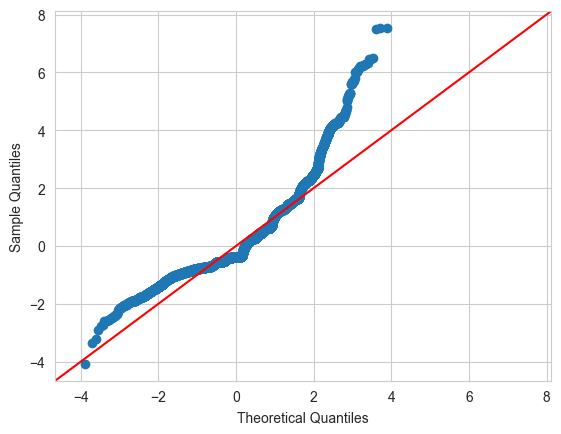

--- Residual Statistics ---
Residual Mean: -0.0026471919298171995
Residual Median: -0.37141335010528564
Residual Skewness: 1.5708075010112235
--- Dispersion of residual ---
Residual upper boundary: 2.234649419784546
Residual lower boundary: -2.478705644607544
Percentage of Overestimated: 3.37%
Percentage of Underestimated: 0.07%


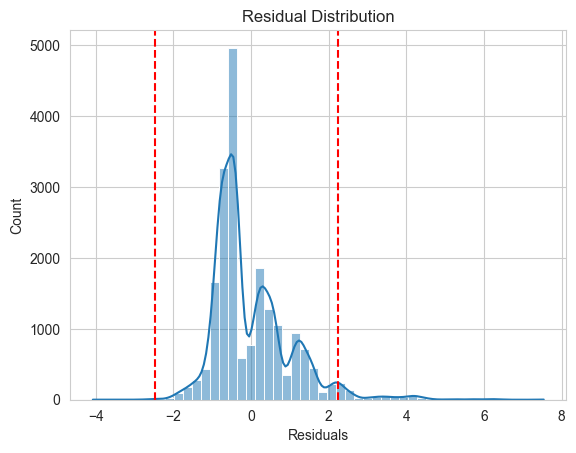

In [83]:
#Cek residual
residuePlot(best_xgb_model, X_test_capped)

In [84]:
#Cek residual
residuals = y_train - y_pred_train_tuned

# Membuat dataframe untuk menyimpan residuals
residual_df = pd.DataFrame({
    'Actual': y_train,
    'Predicted': y_pred_train_tuned,
    'Residual': residuals
})

# Cari 5% data dengan error terbesar
threshold = residual_df['Residual'].abs().quantile(0.95)
difficult_to_predict = residual_df[residual_df['Residual'].abs() >= threshold]
print("Sample data yg susah untuk di prediksi (top 5% largest residuals):")
print(difficult_to_predict.sort_values(by='Residual', key=abs, ascending=False).head())

Sample data yg susah untuk di prediksi (top 5% largest residuals):
       Actual  Predicted  Residual
14759      11   2.451971  8.548029
4824       12   4.140928  7.859072
84082      10   2.172396  7.827604
70906      15   7.844584  7.155416
26297      12   5.043907  6.956093


Dari hasil diatas diketahui nilai yg susah di prediksi:
- Nilai besar - Model susah memprediksi dengan nilai besar mulai dari 10 keatas. Ini mendukung residual distribution sebelumnya jika model akan overestimated di nilai tinggi.
- Range prediksi - Model susah memprediksi di range nilai 10 - 15
- Residual tinggi - Model memberikan nilai yg rendah di nilai aktual tinggi yg otomatis akan memberikan residual besar. Ini bisa dijadikan sebuah insight, jika hasil prediksi model di nilai yg cukup rendah di range 2-7 kemungkinan model memberikan false prediction. Perlu diingat bahwa prediksi model dipakai sebagai referensi ke pihak rumah sakit.

In [85]:
# Cari 5% data dengan error terkecil
threshold_easy = residual_df['Residual'].abs().quantile(0.05)
easy_to_predict = residual_df[residual_df['Residual'].abs() <= threshold_easy]
print("Sample data yg mudah di prediksi (bottom 5% smallest residuals):")
print(easy_to_predict.sort_values(by='Residual', key=abs, ascending=True).head())

Sample data yg mudah di prediksi (bottom 5% smallest residuals):
       Actual  Predicted  Residual
96517       9   9.000013 -0.000013
7322        6   5.999969  0.000031
26952       6   5.999969  0.000031
14029       6   5.999945  0.000055
94513       6   6.000090 -0.000090


Dari prediksi diatas :
- Data yang mudah diprediksi adalah data yang memiliki residual terkecil, artinya model dapat memprediksi dengan baik.
- Nilai prediksi mudah di range tengah-tengah - Model dapat memprediksi dengan baik di range yg tergolong tengah di 6-9 hari
- Residual rendah - Hasil residual yg rendah mendekati 0, menunjukkan jika prediksi di 6-9 hari hasil tersebut cukup baik.

Hasil residual menunjukkan hasil yg lebih baik sesudah di tuning dari segi distribusi, heteroskedasticity, skewness, dan cara model memprediksi nilai rendah atau tinggi. Antara sebelum dan sesudah di tuning, disini saya akan memilih Model XGB-tuned sebagai model terbaik karena model simple dan interpretasi nya.

# ix. Model saving

Model saving for deployment/model inference

In [86]:
#Save the file
with open('model.pkl', 'wb') as file_1:
    pickle.dump(best_xgb_model, file_1)

# x. Model Inference

Model inference for testing trained model. Click the link below to open notebook.

[Buka notebook](notebook_inference_muhammad_iqbal.ipynb)

# xi. Pengambilan Kesimpulan

Dalam projek kali ini, telah berhasil dibuat model machine learning menggunakan algoritma XGB untuk memprediksi seberapa lama rawat inap pasien dari hasil uji lab dan diagnosis pasien dengan cukup akurat. XGB Regressor dipilih karena mampu memberikan prediksi yang stabil dengan regularisasi yang baik, menghindari overfitting tanpa mengorbankan performa model secara signifikan. Model ini telah melalui serangkaian tahapan pembersihan data, pemrosesan fitur, eksplorasi pola hubungan antar variabel, serta tuning hyperparameter untuk mendapatkan performa terbaik. Dengan penerapan pipeline, proses transformasi data dapat dilakukan secara efisien pada tahap model inferensi. Berikut beberapa saran untuk iterasi selanjutnya:
-  `Coba model lebih kompleks (ensemble models)` - Karena regression biasa mungkin tidak cukup menangkap non-linearitas dalam data, maka model ensemble seperti Gradient Boosting atau Stacking bisa dicoba. Alasan: Ensemble methods biasanya outperform single models dalam prediksi kompleks (Sumber: Zhou, "Ensemble Methods: Foundations and Algorithms", 2012).
- `Menambahkan data real-time atau update data lebih baru` - Saat ini dataset menggunakan snapshot statis, padahal kondisi medis pasien bisa berubah. Menambahkan data real-time (seperti perubahan status vital) bisa meningkatkan akurasi prediksi.
Alasan: Model prediksi berbasis data real-time terbukti meningkatkan akurasi dalam prediksi kesehatan (Sumber: Rajkomar et al., "Scalable and accurate deep learning with electronic health records", npj Digital Medicine, 2018)
- `Menangani imbalance data pada LOS ekstrem` - Analisis residual menunjukkan model kesulitan pada pasien dengan LOS sangat tinggi.
Maka, bisa dilakukan teknik balancing seperti oversampling di grup pasien dengan LOS panjang.
Alasan: Machine learning models often perform poorly when trained on imbalanced data (Sumber: He and Garcia, "Learning from Imbalanced Data", IEEE Transactions on Knowledge and Data Engineering, 2009)

### ======================================================

## Conceptual Problems

### Jelaskan latar belakang adanya bagging dan cara kerja bagging !

Bagging diperkenalkan untuk mengatasi overfitting dan meningkatkan stabilitas model dengan mengurangi varians. Metode ini berguna untuk model yang memiliki variansi tinggi, seperti decision tree, yang cenderung mudah berubah jika ada sedikit perubahan pada data training.

**Cara Kerja Bagging:**     
Bootstrap Sampling: Data training dibagi menjadi beberapa subset dengan sampling dengan pengembalian (replacement).     
Training Model: Model yang sama (misalnya Decision Tree) dilatih secara independen pada setiap subset.      
Averaging Prediction: Untuk regresi, hasil prediksi model-model tersebut dirata-ratakan. Untuk klasifikasi, digunakan metode voting mayoritas.      

### Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

Pada projek ini algoritma boosting yg saya pakai adalah XGB Regressor. Perbedannya adalah random forest cocok untuk dataset dengan noise tinggi dan membutuhkan model yang stabil. Sedangkan, XGB Regressor lebih baik dalam menangani pola kompleks dengan performansi lebih tinggi, tetapi perlu hyperparameter tuning agar tidak overfit.

### Jelaskan apa yang dimaksud dengan Cross Validation !

Cross Validation adalah teknik untuk mengevaluasi performa model secara lebih akurat dengan cara membagi dataset menjadi beberapa bagian (folds) dan melatih model pada setiap bagian secara bergantian.